# TCNNF Stock Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
pd.options.display.max_columns=1000
plt.style.use(style='seaborn')

In [3]:
df_tcnnf = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/tcnnf.csv')
df_tcnnf['Date'] = pd.to_datetime(df_tcnnf['Date'])
df_tcnnf = df_tcnnf.set_index('Date')
df_tcnnf = df_tcnnf.rename(columns={'Open':'tcnnf_Open', 'High':'tcnnf_High', 'Low':'tcnnf_Low', 'Close':'tcnnf_Close', 'Volume':'tcnnf_Volume'})
df_tcnnf = df_tcnnf.drop('Adj Close', axis=1)
df_tcnnf['tcnnf_prev_close'] = df_tcnnf['tcnnf_Close'].shift(1)
df_tcnnf['tcnnf_next_close'] = df_tcnnf['tcnnf_Close'].shift(-1)
df_tcnnf['tcnnf_diff'] = df_tcnnf['tcnnf_Close'].diff()
df_tcnnf['tcnnf_%change'] = df_tcnnf['tcnnf_Close'].pct_change()
df_tcnnf['tcnnf_5day_avg_close'] = df_tcnnf['tcnnf_Close'].rolling(5).mean()
df_tcnnf['tcnnf_5day_avg_diff'] = df_tcnnf['tcnnf_diff'].rolling(5).mean()
df_tcnnf['tcnnf_10day_avg_close'] = df_tcnnf['tcnnf_Close'].rolling(10).mean()
df_tcnnf['tcnnf_10day_avg_diff'] = df_tcnnf['tcnnf_diff'].rolling(10).mean()

In [4]:
df_tcnnf

tcnnf_Open  tcnnf_High  tcnnf_Low  tcnnf_Close  tcnnf_Volume  \
Date                                                                       
2018-09-27    9.499000   12.000000      9.499       10.507        170400   
2018-09-28   12.000000   12.000000     11.065       11.675        175100   
2018-10-01   12.492000   14.847000     12.475       14.847        324900   
2018-10-02   15.381000   17.789000     15.326       17.270        335600   
2018-10-03   18.587999   18.589001     14.440       15.574        346300   
...                ...         ...        ...          ...           ...   
2022-05-03   14.200000   14.350000     13.540       13.740        522400   
2022-05-04   14.640000   14.640000     13.250       13.750        394600   
2022-05-05   13.990000   13.990000     12.720       13.600        839600   
2022-05-06   13.500000   14.830000     12.791       14.800        315500   
2022-05-09   14.365000   14.900000     13.377       14.230        306300   

            tcnnf_prev_close  tcnnf_next_close  tcnnf_diff  tcnnf_%change  \
Date                                                                        
2018-09-27               NaN            11.675         NaN            NaN   
2018-09-28            10.507            14.847       1.168       0.111164   
2018-10-01            11.675            17.270       3.172       0.271692   
2018-10-02            14.847            15.574       2.423       0.163198   
2018-10-03            17.270            13.938      -1.696      -0.098205   
...                      ...               ...         ...            ...   
2022-05-03            14.100            13.750      -0.360      -0.025532   
2022-05-04            13.740            13.600       0.010       0.000728   
2022-05-05            13.750            14.800      -0.150      -0.010909   
2022-05-06            13.600            14.230       1.200       0.088235   
2022-05-09            14.800               NaN      -0.570      -0.038514   

            tcnnf_5day_avg_close  tcnnf_5day_avg_diff  tcnnf_10day_avg_close  \
Date                                                                           
2018-09-27                   NaN                  NaN                    NaN   
2018-09-28                   NaN                  NaN                    NaN   
2018-10-01                   NaN                  NaN                    NaN   
2018-10-02                   NaN                  NaN                    NaN   
2018-10-03               13.9746                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-03               14.4348              -0.4500                15.6032   
2022-05-04               14.1688              -0.2660                15.2144   
2022-05-05               13.9208              -0.2480                14.8734   
2022-05-06               13.9980               0.0772                14.6734   
2022-05-09               14.0240               0.0260                14.4544   

            tcnnf_10day_avg_diff  
Date                              
2018-09-27                   NaN  
2018-09-28                   NaN  
2018-10-01                   NaN  
2018-10-02                   NaN  
2018-10-03                   NaN  
...                          ...  
2022-05-03               -0.4470  
2022-05-04               -0.3888  
2022-05-05               -0.3410  
2022-05-06               -0.2000  
2022-05-09               -0.2190  

[910 rows x 13 columns]

In [5]:
cut = df_tcnnf.index.min()
cut

Timestamp('2018-09-27 00:00:00')

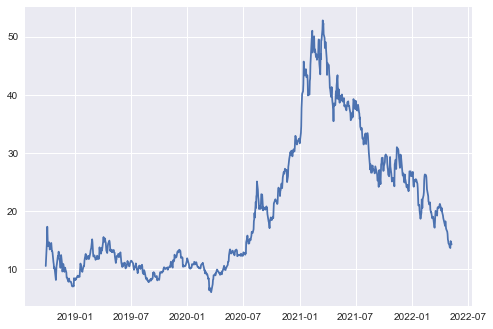

In [6]:
plt.plot(df_tcnnf['tcnnf_Close'])

## TCNNF and DJIX

In [7]:
df_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_dow.csv')
df_dow['Date'] = pd.to_datetime(df_dow['Date'])
df_dow = df_dow.set_index('Date')
df_dow

djix_Open  djix_High  djix_Low  djix_Close  djix_Volume  \
Date                                                                  
1896-05-27      29.39      29.39     29.39       29.39          NaN   
1896-05-28      29.11      29.11     29.11       29.11          NaN   
1896-05-29      29.43      29.43     29.43       29.43          NaN   
1896-06-01      29.40      29.40     29.40       29.40          NaN   
1896-06-02      29.00      29.00     29.00       29.00          NaN   
...               ...        ...       ...         ...          ...   
2022-05-04   33171.80   34117.74  33021.84    34061.06  479098068.0   
2022-05-05   33854.17   33854.17  32685.10    32997.97  507031169.0   
2022-05-06   32773.88   33055.84  32474.69    32899.37  457941820.0   
2022-05-09   32685.17   32685.17  32121.98    32245.70  535207901.0   
2022-05-10   32504.09   32752.17  31887.89    32160.74  493104054.0   

            djix_prev_close  djix_next_close  djix_diff  djix_%change  \
Date                                                                    
1896-05-27              NaN            29.11        NaN           NaN   
1896-05-28            29.39            29.43      -0.28     -0.009527   
1896-05-29            29.11            29.40       0.32      0.010993   
1896-06-01            29.43            29.00      -0.03     -0.001019   
1896-06-02            29.40            28.80      -0.40     -0.013605   
...                     ...              ...        ...           ...   
2022-05-04         33128.79         32997.97     932.27      0.028141   
2022-05-05         34061.06         32899.37   -1063.09     -0.031211   
2022-05-06         32997.97         32245.70     -98.60     -0.002988   
2022-05-09         32899.37         32160.74    -653.67     -0.019869   
2022-05-10         32245.70              NaN     -84.96     -0.002635   

            djix_5day_avg_close  djix_5day_avg_diff  djix_10day_avg_close  \
Date                                                                        
1896-05-27                  NaN                 NaN                   NaN   
1896-05-28                  NaN                 NaN                   NaN   
1896-05-29                  NaN                 NaN                   NaN   
1896-06-01                  NaN                 NaN                   NaN   
1896-06-02               29.266                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-04            33428.990             151.826             33634.068   
2022-05-05            33245.306            -183.684             33454.589   
2022-05-06            33229.738             -15.568             33363.386   
2022-05-09            33066.578            -163.160             33183.010   
2022-05-10            32872.968            -193.610             33075.066   

            djix_10day_avg_diff  
Date                             
1896-05-27                  NaN  
1896-05-28                  NaN  
1896-05-29                  NaN  
1896-06-01                  NaN  
1896-06-02                  NaN  
...                         ...  
2022-05-04             -109.973  
2022-05-05             -179.479  
2022-05-06              -91.203  
2022-05-09             -180.376  
2022-05-10             -107.944  

[32631 rows x 13 columns]

In [8]:
df0 = pd.merge(df_tcnnf, df_dow, on='Date', how='left')
df0

tcnnf_Open  tcnnf_High  tcnnf_Low  tcnnf_Close  tcnnf_Volume  \
Date                                                                       
2018-09-27    9.499000   12.000000      9.499       10.507        170400   
2018-09-28   12.000000   12.000000     11.065       11.675        175100   
2018-10-01   12.492000   14.847000     12.475       14.847        324900   
2018-10-02   15.381000   17.789000     15.326       17.270        335600   
2018-10-03   18.587999   18.589001     14.440       15.574        346300   
...                ...         ...        ...          ...           ...   
2022-05-03   14.200000   14.350000     13.540       13.740        522400   
2022-05-04   14.640000   14.640000     13.250       13.750        394600   
2022-05-05   13.990000   13.990000     12.720       13.600        839600   
2022-05-06   13.500000   14.830000     12.791       14.800        315500   
2022-05-09   14.365000   14.900000     13.377       14.230        306300   

            tcnnf_prev_close  tcnnf_next_close  tcnnf_diff  tcnnf_%change  \
Date                                                                        
2018-09-27               NaN            11.675         NaN            NaN   
2018-09-28            10.507            14.847       1.168       0.111164   
2018-10-01            11.675            17.270       3.172       0.271692   
2018-10-02            14.847            15.574       2.423       0.163198   
2018-10-03            17.270            13.938      -1.696      -0.098205   
...                      ...               ...         ...            ...   
2022-05-03            14.100            13.750      -0.360      -0.025532   
2022-05-04            13.740            13.600       0.010       0.000728   
2022-05-05            13.750            14.800      -0.150      -0.010909   
2022-05-06            13.600            14.230       1.200       0.088235   
2022-05-09            14.800               NaN      -0.570      -0.038514   

            tcnnf_5day_avg_close  tcnnf_5day_avg_diff  tcnnf_10day_avg_close  \
Date                                                                           
2018-09-27                   NaN                  NaN                    NaN   
2018-09-28                   NaN                  NaN                    NaN   
2018-10-01                   NaN                  NaN                    NaN   
2018-10-02                   NaN                  NaN                    NaN   
2018-10-03               13.9746                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-03               14.4348              -0.4500                15.6032   
2022-05-04               14.1688              -0.2660                15.2144   
2022-05-05               13.9208              -0.2480                14.8734   
2022-05-06               13.9980               0.0772                14.6734   
2022-05-09               14.0240               0.0260                14.4544   

            tcnnf_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2018-09-27                   NaN   26418.27   26557.01  26379.95    26439.93   
2018-09-28                   NaN   26407.66   26515.76  26383.57    26458.31   
2018-10-01                   NaN   26598.36   26737.98  26596.05    26651.21   
2018-10-02                   NaN   26648.91   26824.78  26627.66    26773.94   
2018-10-03                   NaN   26833.47   26951.81  26789.08    26828.39   
...                          ...        ...        ...       ...         ...   
2022-05-03               -0.4470   33086.09   33341.58  32914.75    33128.79   
2022-05-04               -0.3888   33171.80   34117.74  33021.84    34061.06   
2022-05-05               -0.3410   33854.17   33854.17  32685.10    32997.97   
2022-05-06               -0.2000   32773.88   33055.84  32474.69    32899.37   
2022-05-09          

In [9]:
df_isna0 = df0.isna()
df_isna0

tcnnf_Open  tcnnf_High  tcnnf_Low  tcnnf_Close  tcnnf_Volume  \
Date                                                                       
2018-09-27       False       False      False        False         False   
2018-09-28       False       False      False        False         False   
2018-10-01       False       False      False        False         False   
2018-10-02       False       False      False        False         False   
2018-10-03       False       False      False        False         False   
...                ...         ...        ...          ...           ...   
2022-05-03       False       False      False        False         False   
2022-05-04       False       False      False        False         False   
2022-05-05       False       False      False        False         False   
2022-05-06       False       False      False        False         False   
2022-05-09       False       False      False        False         False   

            tcnnf_prev_close  tcnnf_next_close  tcnnf_diff  tcnnf_%change  \
Date                                                                        
2018-09-27              True             False        True           True   
2018-09-28             False             False       False          False   
2018-10-01             False             False       False          False   
2018-10-02             False             False       False          False   
2018-10-03             False             False       False          False   
...                      ...               ...         ...            ...   
2022-05-03             False             False       False          False   
2022-05-04             False             False       False          False   
2022-05-05             False             False       False          False   
2022-05-06             False             False       False          False   
2022-05-09             False              True       False          False   

            tcnnf_5day_avg_close  tcnnf_5day_avg_diff  tcnnf_10day_avg_close  \
Date                                                                           
2018-09-27                  True                 True                   True   
2018-09-28                  True                 True                   True   
2018-10-01                  True                 True                   True   
2018-10-02                  True                 True                   True   
2018-10-03                 False                 True                   True   
...                          ...                  ...                    ...   
2022-05-03                 False                False                  False   
2022-05-04                 False                False                  False   
2022-05-05                 False                False                  False   
2022-05-06                 False                False                  False   
2022-05-09                 False                False                  False   

            tcnnf_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2018-09-27                  True      False      False     False       False   
2018-09-28                  True      False      False     False       False   
2018-10-01                  True      False      False     False       False   
2018-10-02                  True      False      False     False       False   
2018-10-03                  True      False      False     False       False   
...                          ...        ...        ...       ...         ...   
2022-05-03                 False      False      False     False       False   
2022-05-04                 False      False      False     False       False   
2022-05-05                 False      False      False     False       False   
2022-05-06                 False      False      False     False       False   
2022-05-09          

In [10]:
df_isna0 = df_isna0.add_suffix('_b')

In [11]:
df0 = df0.fillna(0)
df0.head()

tcnnf_Open  tcnnf_High  tcnnf_Low  tcnnf_Close  tcnnf_Volume  \
Date                                                                       
2018-09-27    9.499000   12.000000      9.499       10.507        170400   
2018-09-28   12.000000   12.000000     11.065       11.675        175100   
2018-10-01   12.492000   14.847000     12.475       14.847        324900   
2018-10-02   15.381000   17.789000     15.326       17.270        335600   
2018-10-03   18.587999   18.589001     14.440       15.574        346300   

            tcnnf_prev_close  tcnnf_next_close  tcnnf_diff  tcnnf_%change  \
Date                                                                        
2018-09-27             0.000            11.675       0.000       0.000000   
2018-09-28            10.507            14.847       1.168       0.111164   
2018-10-01            11.675            17.270       3.172       0.271692   
2018-10-02            14.847            15.574       2.423       0.163198   
2018-10-03            17.270            13.938      -1.696      -0.098205   

            tcnnf_5day_avg_close  tcnnf_5day_avg_diff  tcnnf_10day_avg_close  \
Date                                                                           
2018-09-27                0.0000                  0.0                    0.0   
2018-09-28                0.0000                  0.0                    0.0   
2018-10-01                0.0000                  0.0                    0.0   
2018-10-02                0.0000                  0.0                    0.0   
2018-10-03               13.9746                  0.0                    0.0   

            tcnnf_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2018-09-27                   0.0   26418.27   26557.01  26379.95    26439.93   
2018-09-28                   0.0   26407.66   26515.76  26383.57    26458.31   
2018-10-01                   0.0   26598.36   26737.98  26596.05    26651.21   
2018-10-02                   0.0   26648.91   26824.78  26627.66    26773.94   
2018-10-03                   0.0   26833.47   26951.81  26789.08    26828.39   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2018-09-27  226281713.0         26385.28         26458.31      54.65   
2018-09-28  264039895.0         26439.93         26651.21      18.38   
2018-10-01  238346239.0         26458.31         26773.94     192.90   
2018-10-02  258331451.0         26651.21         26828.39     122.73   
2018-10-03  280155725.0         26773.94         26627.48      54.45   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2018-09-27      0.002071            26524.594             -43.410   
2018-09-28      0.000695            26467.556             -57.038   
2018-10-01      0.007291            26485.388              17.832   
2018-10-02      0.004605            26541.734              56.346   
2018-10-03      0.002034            26630.356              88.622   

            djix_10day_avg_close  djix_10day_avg_diff  
Date                                                   
2018-09-27             26414.946               29.394  
2018-09-28             26445.310               30.364  
2018-10-01             26504.219               58.909  
2018-10-02             26556.917               52.698  
2018-10-03             26599.180               42.263

In [12]:
df0 = pd.concat([df0, df_isna0], axis=1)
df0

tcnnf_Open  tcnnf_High  tcnnf_Low  tcnnf_Close  tcnnf_Volume  \
Date                                                                       
2018-09-27    9.499000   12.000000      9.499       10.507        170400   
2018-09-28   12.000000   12.000000     11.065       11.675        175100   
2018-10-01   12.492000   14.847000     12.475       14.847        324900   
2018-10-02   15.381000   17.789000     15.326       17.270        335600   
2018-10-03   18.587999   18.589001     14.440       15.574        346300   
...                ...         ...        ...          ...           ...   
2022-05-03   14.200000   14.350000     13.540       13.740        522400   
2022-05-04   14.640000   14.640000     13.250       13.750        394600   
2022-05-05   13.990000   13.990000     12.720       13.600        839600   
2022-05-06   13.500000   14.830000     12.791       14.800        315500   
2022-05-09   14.365000   14.900000     13.377       14.230        306300   

            tcnnf_prev_close  tcnnf_next_close  tcnnf_diff  tcnnf_%change  \
Date                                                                        
2018-09-27             0.000            11.675       0.000       0.000000   
2018-09-28            10.507            14.847       1.168       0.111164   
2018-10-01            11.675            17.270       3.172       0.271692   
2018-10-02            14.847            15.574       2.423       0.163198   
2018-10-03            17.270            13.938      -1.696      -0.098205   
...                      ...               ...         ...            ...   
2022-05-03            14.100            13.750      -0.360      -0.025532   
2022-05-04            13.740            13.600       0.010       0.000728   
2022-05-05            13.750            14.800      -0.150      -0.010909   
2022-05-06            13.600            14.230       1.200       0.088235   
2022-05-09            14.800             0.000      -0.570      -0.038514   

            tcnnf_5day_avg_close  tcnnf_5day_avg_diff  tcnnf_10day_avg_close  \
Date                                                                           
2018-09-27                0.0000               0.0000                 0.0000   
2018-09-28                0.0000               0.0000                 0.0000   
2018-10-01                0.0000               0.0000                 0.0000   
2018-10-02                0.0000               0.0000                 0.0000   
2018-10-03               13.9746               0.0000                 0.0000   
...                          ...                  ...                    ...   
2022-05-03               14.4348              -0.4500                15.6032   
2022-05-04               14.1688              -0.2660                15.2144   
2022-05-05               13.9208              -0.2480                14.8734   
2022-05-06               13.9980               0.0772                14.6734   
2022-05-09               14.0240               0.0260                14.4544   

            tcnnf_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2018-09-27                0.0000   26418.27   26557.01  26379.95    26439.93   
2018-09-28                0.0000   26407.66   26515.76  26383.57    26458.31   
2018-10-01                0.0000   26598.36   26737.98  26596.05    26651.21   
2018-10-02                0.0000   26648.91   26824.78  26627.66    26773.94   
2018-10-03                0.0000   26833.47   26951.81  26789.08    26828.39   
...                          ...        ...        ...       ...         ...   
2022-05-03               -0.4470   33086.09   33341.58  32914.75    33128.79   
2022-05-04               -0.3888   33171.80   34117.74  33021.84    34061.06   
2022-05-05               -0.3410   33854.17   33854.17  32685.10    32997.97   
2022-05-06               -0.2000   32773.88   33055.84  32474.69    32899.37   
2022-05-09          

In [13]:
df0['month'] = df0.index.month
df0['day'] = df0.index.day
df0['year'] = df0.index.year
df0['quarter'] = (df0['month']-1)//3 + 1

In [14]:
cols = df0.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'tcnnf_Open']

In [15]:
df0 = df0[cols].copy()
df0.head()

month  day  year  quarter  tcnnf_Open  tcnnf_High  tcnnf_Low  \
Date                                                                       
2018-09-27      9   27  2018        3    9.499000   12.000000      9.499   
2018-09-28      9   28  2018        3   12.000000   12.000000     11.065   
2018-10-01     10    1  2018        4   12.492000   14.847000     12.475   
2018-10-02     10    2  2018        4   15.381000   17.789000     15.326   
2018-10-03     10    3  2018        4   18.587999   18.589001     14.440   

            tcnnf_Close  tcnnf_Volume  tcnnf_prev_close  tcnnf_next_close  \
Date                                                                        
2018-09-27       10.507        170400             0.000            11.675   
2018-09-28       11.675        175100            10.507            14.847   
2018-10-01       14.847        324900            11.675            17.270   
2018-10-02       17.270        335600            14.847            15.574   
2018-10-03       15.574        346300            17.270            13.938   

            tcnnf_diff  tcnnf_%change  tcnnf_5day_avg_close  \
Date                                                          
2018-09-27       0.000       0.000000                0.0000   
2018-09-28       1.168       0.111164                0.0000   
2018-10-01       3.172       0.271692                0.0000   
2018-10-02       2.423       0.163198                0.0000   
2018-10-03      -1.696      -0.098205               13.9746   

            tcnnf_5day_avg_diff  tcnnf_10day_avg_close  tcnnf_10day_avg_diff  \
Date                                                                           
2018-09-27                  0.0                    0.0                   0.0   
2018-09-28                  0.0                    0.0                   0.0   
2018-10-01                  0.0                    0.0                   0.0   
2018-10-02                  0.0                    0.0                   0.0   
2018-10-03                  0.0                    0.0                   0.0   

            djix_Open  djix_High  djix_Low  djix_Close  djix_Volume  \
Date                                                                  
2018-09-27   26418.27   26557.01  26379.95    26439.93  226281713.0   
2018-09-28   26407.66   26515.76  26383.57    26458.31  264039895.0   
2018-10-01   26598.36   26737.98  26596.05    26651.21  238346239.0   
2018-10-02   26648.91   26824.78  26627.66    26773.94  258331451.0   
2018-10-03   26833.47   26951.81  26789.08    26828.39  280155725.0   

            djix_prev_close  djix_next_close  djix_diff  djix_%change  \
Date                                                                    
2018-09-27         26385.28         26458.31      54.65      0.002071   
2018-09-28         26439.93         26651.21      18.38      0.000695   
2018-10-01         26458.31         26773.94     192.90      0.007291   
2018-10-02         26651.21         26828.39     122.73      0.004605   
2018-10-03         26773.94         26627.48      54.45      0.002034   

            djix_5day_avg_close  djix_5day_avg_diff  djix_10day_avg_close  \
Date                                                                        
2018-09-27            26524.594             -43.410             26414.946   
2018-09-28            26467.556             -57.038             26445.310   
2018-10-01            26485.388              17.832             26504.219   
2018-10-02            26541.734              56.346             26556.917   
2018-10-03            26630.356              88.622             26599.180   

            djix_10day_avg_diff  tcnnf_Open_b  tcnnf_High_b  tcnnf_Low_b  \
Date                                                                       
2018-09-27               29.394         False         False        False   
2018-09-28               30.364         False         False        False   
2018-10-01               58.909         False         False        False   
2018-1

In [16]:
df0.drop(df0.tail(1).index, inplace=True)

In [17]:
df0.shape

(909, 56)

In [18]:
n = int(len(df0) * 0.9)
n

818

In [19]:
train0 = df0[:n]
test0 = df0[n:]

In [20]:
print(len(train0))
print(len(test0))

818
91


In [21]:
X_train0 = train0.drop('tcnnf_next_close', axis=1)
X_train0.head(3)

month  day  year  quarter  tcnnf_Open  tcnnf_High  tcnnf_Low  \
Date                                                                       
2018-09-27      9   27  2018        3       9.499      12.000      9.499   
2018-09-28      9   28  2018        3      12.000      12.000     11.065   
2018-10-01     10    1  2018        4      12.492      14.847     12.475   

            tcnnf_Close  tcnnf_Volume  tcnnf_prev_close  tcnnf_diff  \
Date                                                                  
2018-09-27       10.507        170400             0.000       0.000   
2018-09-28       11.675        175100            10.507       1.168   
2018-10-01       14.847        324900            11.675       3.172   

            tcnnf_%change  tcnnf_5day_avg_close  tcnnf_5day_avg_diff  \
Date                                                                   
2018-09-27       0.000000                   0.0                  0.0   
2018-09-28       0.111164                   0.0                  0.0   
2018-10-01       0.271692                   0.0                  0.0   

            tcnnf_10day_avg_close  tcnnf_10day_avg_diff  djix_Open  djix_High  \
Date                                                                            
2018-09-27                    0.0                   0.0   26418.27   26557.01   
2018-09-28                    0.0                   0.0   26407.66   26515.76   
2018-10-01                    0.0                   0.0   26598.36   26737.98   

            djix_Low  djix_Close  djix_Volume  djix_prev_close  \
Date                                                             
2018-09-27  26379.95    26439.93  226281713.0         26385.28   
2018-09-28  26383.57    26458.31  264039895.0         26439.93   
2018-10-01  26596.05    26651.21  238346239.0         26458.31   

            djix_next_close  djix_diff  djix_%change  djix_5day_avg_close  \
Date                                                                        
2018-09-27         26458.31      54.65      0.002071            26524.594   
2018-09-28         26651.21      18.38      0.000695            26467.556   
2018-10-01         26773.94     192.90      0.007291            26485.388   

            djix_5day_avg_diff  djix_10day_avg_close  djix_10day_avg_diff  \
Date                                                                        
2018-09-27             -43.410             26414.946               29.394   
2018-09-28             -57.038             26445.310               30.364   
2018-10-01              17.832             26504.219               58.909   

            tcnnf_Open_b  tcnnf_High_b  tcnnf_Low_b  tcnnf_Close_b  \
Date                                                                 
2018-09-27         False         False        False          False   
2018-09-28         False         False        False          False   
2018-10-01         False         False        False          False   

            tcnnf_Volume_b  tcnnf_prev_close_b  tcnnf_next_close_b  \
Date                                                                 
2018-09-27           False                True               False   
2018-09-28           False               False               False   
2018-10-01           False               False               False   

            tcnnf_diff_b  tcnnf_%change_b  tcnnf_5day_avg_close_b  \
Date                                                                
2018-09-27          True             True                    True   
2018-09-28         False            False                    True   
2018-10-01         False            False                    True   

            tcnnf_5day_avg_diff_b  tcnnf_10day_avg_close_b  \
Date                                                         
2018-09-27                   True                     True   
2018-09-28                   True                     True   
2018-10-01                   True                     True   

            tcnnf_10day_avg_diff_b  djix_Open_

In [22]:
X_train0.shape

(818, 55)

In [23]:
y_train0 = train0['tcnnf_next_close']
y_train0.head(3)

Date
2018-09-27    11.675
2018-09-28    14.847
2018-10-01    17.270
Name: tcnnf_next_close, dtype: float64

In [24]:
y_train0.tail(3)

Date
2021-12-22    26.799999
2021-12-23    26.799999
2021-12-27    25.985001
Name: tcnnf_next_close, dtype: float64

In [25]:
X_test0 = test0.drop('tcnnf_next_close', axis=1)
y_test0 = test0['tcnnf_next_close']

In [26]:
X_test0.head(3)

month  day  year  quarter  tcnnf_Open  tcnnf_High  tcnnf_Low  \
Date                                                                       
2021-12-28     12   28  2021        4   26.900000   26.990000      25.00   
2021-12-29     12   29  2021        4   26.000000   26.799999      25.18   
2021-12-30     12   30  2021        4   26.889999   26.980000      25.98   

            tcnnf_Close  tcnnf_Volume  tcnnf_prev_close  tcnnf_diff  \
Date                                                                  
2021-12-28    25.985001        271600         26.799999   -0.814998   
2021-12-29    26.520000        294800         25.985001    0.534999   
2021-12-30    26.209999        336400         26.520000   -0.310001   

            tcnnf_%change  tcnnf_5day_avg_close  tcnnf_5day_avg_diff  \
Date                                                                   
2021-12-28      -0.030410                25.673                0.521   
2021-12-29       0.020589                26.271                0.598   
2021-12-30      -0.011689                26.463                0.192   

            tcnnf_10day_avg_close  tcnnf_10day_avg_diff  djix_Open  djix_High  \
Date                                                                            
2021-12-28                24.8795                0.1535   36302.99   36527.26   
2021-12-29                25.1265                0.2470   36421.14   36571.55   
2021-12-30                25.2975                0.1710   36522.48   36679.44   

            djix_Low  djix_Close  djix_Volume  djix_prev_close  \
Date                                                             
2021-12-28  36302.99    36398.21  286735174.0         36302.38   
2021-12-29  36396.19    36488.63  251970628.0         36398.21   
2021-12-30  36372.13    36398.08  241218115.0         36488.63   

            djix_next_close  djix_diff  djix_%change  djix_5day_avg_close  \
Date                                                                        
2021-12-28         36488.63      95.83      0.002640            35979.548   
2021-12-29         36398.08      90.42      0.002484            36178.734   
2021-12-30         36338.30     -90.55     -0.002482            36307.572   

            djix_5day_avg_diff  djix_10day_avg_close  djix_10day_avg_diff  \
Date                                                                        
2021-12-28             293.210             35756.459               74.726   
2021-12-29             199.186             35850.904               94.445   
2021-12-30             128.838             35897.969               47.065   

            tcnnf_Open_b  tcnnf_High_b  tcnnf_Low_b  tcnnf_Close_b  \
Date                                                                 
2021-12-28         False         False        False          False   
2021-12-29         False         False        False          False   
2021-12-30         False         False        False          False   

            tcnnf_Volume_b  tcnnf_prev_close_b  tcnnf_next_close_b  \
Date                                                                 
2021-12-28           False               False               False   
2021-12-29           False               False               False   
2021-12-30           False               False               False   

            tcnnf_diff_b  tcnnf_%change_b  tcnnf_5day_avg_close_b  \
Date                                                                
2021-12-28         False            False                   False   
2021-12-29         False            False                   False   
2021-12-30         False            False                   False   

            tcnnf_5day_avg_diff_b  tcnnf_10day_avg_close_b  \
Date                                                         
2021-12-28                  False                    False   
2021-12-29                  False                    False   
2021-12-30                  False                    False   

            tcnnf_10day_avg_diff_b  djix_Open_

In [27]:
X_test0.shape

(91, 55)

In [28]:
y_test0.tail(3)

Date
2022-05-04    13.60
2022-05-05    14.80
2022-05-06    14.23
Name: tcnnf_next_close, dtype: float64

In [29]:
from sklearn.linear_model import LinearRegression
hyper_table = list()

In [30]:
model0 = LinearRegression()
model0.fit(X_train0, y_train0)
y_pred0 = model0.predict(X_test0)

In [31]:
y_pred0[:5]

array([25.9354231 , 26.629895  , 26.07834619, 25.91773195, 26.79392241])

In [32]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man0 = rmse_manual(y_test0, y_pred0)
print(rmse_man0)

0.6878851448994089


In [33]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man0 = mae_manual(y_test0, y_pred0)
print(mae_man0)

0.5580183746617344


In [34]:
hyper_table.append(dict(version='1+Dow',
                        model=model0, 
                        rmse=rmse_man0,
                        mae=mae_man0,
                        rows=df0.shape[0], 
                        train_rows=X_train0.shape[0],
                        test_rows=X_test0.shape[0],
                        columns=df0.shape[1]))

In [35]:
y_train0 = pd.DataFrame(y_train0, columns=['tcnnf_next_close'])
y_test0 = pd.DataFrame(y_test0, columns=['tcnnf_next_close'])

In [36]:
y_test0['tcnnf_pred_next_close'] = y_pred0

In [37]:
y_test0.tail()

tcnnf_next_close  tcnnf_pred_next_close
Date                                               
2022-05-02             13.74              14.247732
2022-05-03             13.75              14.431006
2022-05-04             13.60              13.546043
2022-05-05             14.80              13.602605
2022-05-06             14.23              14.801846

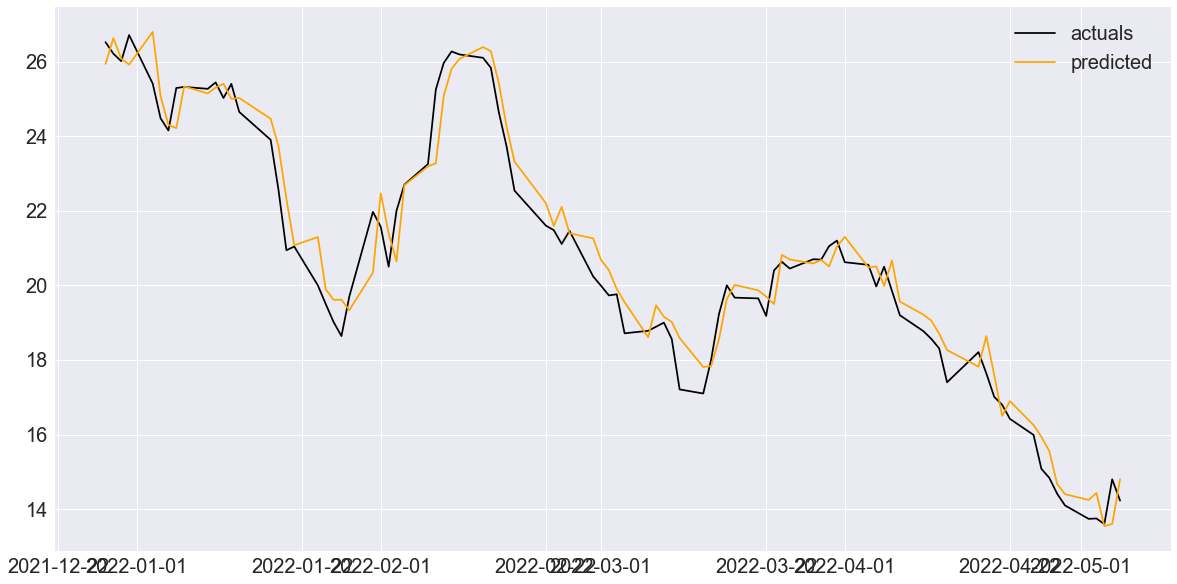

In [38]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test0['tcnnf_next_close'], color='black')
ax.plot(y_test0['tcnnf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## TCNNF and Cannabis ETFs

In [39]:
df_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs.csv')
df_etfs['Date'] = pd.to_datetime(df_etfs['Date'])
df_etfs = df_etfs.set_index('Date')

In [40]:
df1 = pd.merge(df_tcnnf, df_etfs, on='Date', how='left')
df1

tcnnf_Open  tcnnf_High  tcnnf_Low  tcnnf_Close  tcnnf_Volume  \
Date                                                                       
2018-09-27    9.499000   12.000000      9.499       10.507        170400   
2018-09-28   12.000000   12.000000     11.065       11.675        175100   
2018-10-01   12.492000   14.847000     12.475       14.847        324900   
2018-10-02   15.381000   17.789000     15.326       17.270        335600   
2018-10-03   18.587999   18.589001     14.440       15.574        346300   
...                ...         ...        ...          ...           ...   
2022-05-03   14.200000   14.350000     13.540       13.740        522400   
2022-05-04   14.640000   14.640000     13.250       13.750        394600   
2022-05-05   13.990000   13.990000     12.720       13.600        839600   
2022-05-06   13.500000   14.830000     12.791       14.800        315500   
2022-05-09   14.365000   14.900000     13.377       14.230        306300   

            tcnnf_prev_close  tcnnf_next_close  tcnnf_diff  tcnnf_%change  \
Date                                                                        
2018-09-27               NaN            11.675         NaN            NaN   
2018-09-28            10.507            14.847       1.168       0.111164   
2018-10-01            11.675            17.270       3.172       0.271692   
2018-10-02            14.847            15.574       2.423       0.163198   
2018-10-03            17.270            13.938      -1.696      -0.098205   
...                      ...               ...         ...            ...   
2022-05-03            14.100            13.750      -0.360      -0.025532   
2022-05-04            13.740            13.600       0.010       0.000728   
2022-05-05            13.750            14.800      -0.150      -0.010909   
2022-05-06            13.600            14.230       1.200       0.088235   
2022-05-09            14.800               NaN      -0.570      -0.038514   

            tcnnf_5day_avg_close  tcnnf_5day_avg_diff  tcnnf_10day_avg_close  \
Date                                                                           
2018-09-27                   NaN                  NaN                    NaN   
2018-09-28                   NaN                  NaN                    NaN   
2018-10-01                   NaN                  NaN                    NaN   
2018-10-02                   NaN                  NaN                    NaN   
2018-10-03               13.9746                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-03               14.4348              -0.4500                15.6032   
2022-05-04               14.1688              -0.2660                15.2144   
2022-05-05               13.9208              -0.2480                14.8734   
2022-05-06               13.9980               0.0772                14.6734   
2022-05-09               14.0240               0.0260                14.4544   

            tcnnf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-09-27                   NaN  39.000000  39.240002  38.209999  38.720001   
2018-09-28                   NaN  38.869999  40.150002  38.650002  40.049999   
2018-10-01                   NaN  41.230000  41.480000  40.230000  40.700001   
2018-10-02                   NaN  40.419998  40.520000  38.459999  38.660000   
2018-10-03                   NaN  39.299999  40.160000  38.500000  40.040001   
...                          ...        ...        ...        ...        ...   
2022-05-03               -0.4470   8.340000   8.470000   8.240000   8.320000   
2022-05-04               -0.3888   8.340000   8.590000   8.100000   8.590000   
2022-05-05               -0.3410   8.500000   8.508000   8.010000   8.050000   
2022-05-06               -0.2000   8.010000   8.050000   7.750000   7.900000   
2022-05-09          

In [41]:
df_isna1 = df1.isna()
df_isna1

tcnnf_Open  tcnnf_High  tcnnf_Low  tcnnf_Close  tcnnf_Volume  \
Date                                                                       
2018-09-27       False       False      False        False         False   
2018-09-28       False       False      False        False         False   
2018-10-01       False       False      False        False         False   
2018-10-02       False       False      False        False         False   
2018-10-03       False       False      False        False         False   
...                ...         ...        ...          ...           ...   
2022-05-03       False       False      False        False         False   
2022-05-04       False       False      False        False         False   
2022-05-05       False       False      False        False         False   
2022-05-06       False       False      False        False         False   
2022-05-09       False       False      False        False         False   

            tcnnf_prev_close  tcnnf_next_close  tcnnf_diff  tcnnf_%change  \
Date                                                                        
2018-09-27              True             False        True           True   
2018-09-28             False             False       False          False   
2018-10-01             False             False       False          False   
2018-10-02             False             False       False          False   
2018-10-03             False             False       False          False   
...                      ...               ...         ...            ...   
2022-05-03             False             False       False          False   
2022-05-04             False             False       False          False   
2022-05-05             False             False       False          False   
2022-05-06             False             False       False          False   
2022-05-09             False              True       False          False   

            tcnnf_5day_avg_close  tcnnf_5day_avg_diff  tcnnf_10day_avg_close  \
Date                                                                           
2018-09-27                  True                 True                   True   
2018-09-28                  True                 True                   True   
2018-10-01                  True                 True                   True   
2018-10-02                  True                 True                   True   
2018-10-03                 False                 True                   True   
...                          ...                  ...                    ...   
2022-05-03                 False                False                  False   
2022-05-04                 False                False                  False   
2022-05-05                 False                False                  False   
2022-05-06                 False                False                  False   
2022-05-09                 False                False                  False   

            tcnnf_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                   
2018-09-27                  True    False    False   False     False   
2018-09-28                  True    False    False   False     False   
2018-10-01                  True    False    False   False     False   
2018-10-02                  True    False    False   False     False   
2018-10-03                  True    False    False   False     False   
...                          ...      ...      ...     ...       ...   
2022-05-03                 False    False    False   False     False   
2022-05-04                 False    False    False   False     False   
2022-05-05                 False    False    False   False     False   
2022-05-06                 False    False    False   False     False   
2022-05-09                 False    False    False   False     False   

            mj_Volume  mj_prev_close  mj_ne

In [42]:
df_isna1 = df_isna1.add_suffix('_b')

In [43]:
df1 = df1.fillna(0)
df1.head()

tcnnf_Open  tcnnf_High  tcnnf_Low  tcnnf_Close  tcnnf_Volume  \
Date                                                                       
2018-09-27    9.499000   12.000000      9.499       10.507        170400   
2018-09-28   12.000000   12.000000     11.065       11.675        175100   
2018-10-01   12.492000   14.847000     12.475       14.847        324900   
2018-10-02   15.381000   17.789000     15.326       17.270        335600   
2018-10-03   18.587999   18.589001     14.440       15.574        346300   

            tcnnf_prev_close  tcnnf_next_close  tcnnf_diff  tcnnf_%change  \
Date                                                                        
2018-09-27             0.000            11.675       0.000       0.000000   
2018-09-28            10.507            14.847       1.168       0.111164   
2018-10-01            11.675            17.270       3.172       0.271692   
2018-10-02            14.847            15.574       2.423       0.163198   
2018-10-03            17.270            13.938      -1.696      -0.098205   

            tcnnf_5day_avg_close  tcnnf_5day_avg_diff  tcnnf_10day_avg_close  \
Date                                                                           
2018-09-27                0.0000                  0.0                    0.0   
2018-09-28                0.0000                  0.0                    0.0   
2018-10-01                0.0000                  0.0                    0.0   
2018-10-02                0.0000                  0.0                    0.0   
2018-10-03               13.9746                  0.0                    0.0   

            tcnnf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-09-27                   0.0  39.000000  39.240002  38.209999  38.720001   
2018-09-28                   0.0  38.869999  40.150002  38.650002  40.049999   
2018-10-01                   0.0  41.230000  41.480000  40.230000  40.700001   
2018-10-02                   0.0  40.419998  40.520000  38.459999  38.660000   
2018-10-03                   0.0  39.299999  40.160000  38.500000  40.040001   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2018-09-27     979100      38.939999      40.049999 -0.219998   -0.005650   
2018-09-28     653600      38.720001      40.700001  1.329998    0.034349   
2018-10-01    1024100      40.049999      38.660000  0.650002    0.016230   
2018-10-02     899800      40.700001      40.040001 -2.040001   -0.050123   
2018-10-03     706700      38.660000      39.090000  1.380001    0.035696   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2018-09-27             39.158         -0.857999              39.261   
2018-09-28             39.268          0.110000              39.689   
2018-10-01             39.554          0.286000              40.044   
2018-10-02             39.414         -0.140000              39.942   
2018-10-03             39.634          0.220000              39.825   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2018-09-27              0.339        0.0        0.0       0.0         0.0   
2018-09-28              0.428        0.0        0.0       0.0         0.0   
2018-10-01              0.355        0.0        0.0       0.0         0.0   
2018-10-02             -0.102        0.0        0.0       0.0         0.0   
2018-10-03             -0.117        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2018-09-27          0.0              0.0              0.0        0.0   
2018-09-28          0.0

In [44]:
df1 = pd.concat([df1, df_isna1], axis=1)
df1

tcnnf_Open  tcnnf_High  tcnnf_Low  tcnnf_Close  tcnnf_Volume  \
Date                                                                       
2018-09-27    9.499000   12.000000      9.499       10.507        170400   
2018-09-28   12.000000   12.000000     11.065       11.675        175100   
2018-10-01   12.492000   14.847000     12.475       14.847        324900   
2018-10-02   15.381000   17.789000     15.326       17.270        335600   
2018-10-03   18.587999   18.589001     14.440       15.574        346300   
...                ...         ...        ...          ...           ...   
2022-05-03   14.200000   14.350000     13.540       13.740        522400   
2022-05-04   14.640000   14.640000     13.250       13.750        394600   
2022-05-05   13.990000   13.990000     12.720       13.600        839600   
2022-05-06   13.500000   14.830000     12.791       14.800        315500   
2022-05-09   14.365000   14.900000     13.377       14.230        306300   

            tcnnf_prev_close  tcnnf_next_close  tcnnf_diff  tcnnf_%change  \
Date                                                                        
2018-09-27             0.000            11.675       0.000       0.000000   
2018-09-28            10.507            14.847       1.168       0.111164   
2018-10-01            11.675            17.270       3.172       0.271692   
2018-10-02            14.847            15.574       2.423       0.163198   
2018-10-03            17.270            13.938      -1.696      -0.098205   
...                      ...               ...         ...            ...   
2022-05-03            14.100            13.750      -0.360      -0.025532   
2022-05-04            13.740            13.600       0.010       0.000728   
2022-05-05            13.750            14.800      -0.150      -0.010909   
2022-05-06            13.600            14.230       1.200       0.088235   
2022-05-09            14.800             0.000      -0.570      -0.038514   

            tcnnf_5day_avg_close  tcnnf_5day_avg_diff  tcnnf_10day_avg_close  \
Date                                                                           
2018-09-27                0.0000               0.0000                 0.0000   
2018-09-28                0.0000               0.0000                 0.0000   
2018-10-01                0.0000               0.0000                 0.0000   
2018-10-02                0.0000               0.0000                 0.0000   
2018-10-03               13.9746               0.0000                 0.0000   
...                          ...                  ...                    ...   
2022-05-03               14.4348              -0.4500                15.6032   
2022-05-04               14.1688              -0.2660                15.2144   
2022-05-05               13.9208              -0.2480                14.8734   
2022-05-06               13.9980               0.0772                14.6734   
2022-05-09               14.0240               0.0260                14.4544   

            tcnnf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-09-27                0.0000  39.000000  39.240002  38.209999  38.720001   
2018-09-28                0.0000  38.869999  40.150002  38.650002  40.049999   
2018-10-01                0.0000  41.230000  41.480000  40.230000  40.700001   
2018-10-02                0.0000  40.419998  40.520000  38.459999  38.660000   
2018-10-03                0.0000  39.299999  40.160000  38.500000  40.040001   
...                          ...        ...        ...        ...        ...   
2022-05-03               -0.4470   8.340000   8.470000   8.240000   8.320000   
2022-05-04               -0.3888   8.340000   8.590000   8.100000   8.590000   
2022-05-05               -0.3410   8.500000   8.508000   8.010000   8.050000   
2022-05-06               -0.2000   8.010000   8.050000   7.750000   7.900000   
2022-05-09          

In [45]:
df1['month'] = df1.index.month
df1['day'] = df1.index.day
df1['year'] = df1.index.year
df1['quarter'] = (df1['month']-1)//3 + 1

In [46]:
cols = df1.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'tcnnf_Open']

In [47]:
df1 = df1[cols].copy()
df1

month  day  year  quarter  tcnnf_Open  tcnnf_High  tcnnf_Low  \
Date                                                                       
2018-09-27      9   27  2018        3    9.499000   12.000000      9.499   
2018-09-28      9   28  2018        3   12.000000   12.000000     11.065   
2018-10-01     10    1  2018        4   12.492000   14.847000     12.475   
2018-10-02     10    2  2018        4   15.381000   17.789000     15.326   
2018-10-03     10    3  2018        4   18.587999   18.589001     14.440   
...           ...  ...   ...      ...         ...         ...        ...   
2022-05-03      5    3  2022        2   14.200000   14.350000     13.540   
2022-05-04      5    4  2022        2   14.640000   14.640000     13.250   
2022-05-05      5    5  2022        2   13.990000   13.990000     12.720   
2022-05-06      5    6  2022        2   13.500000   14.830000     12.791   
2022-05-09      5    9  2022        2   14.365000   14.900000     13.377   

            tcnnf_Close  tcnnf_Volume  tcnnf_prev_close  tcnnf_next_close  \
Date                                                                        
2018-09-27       10.507        170400             0.000            11.675   
2018-09-28       11.675        175100            10.507            14.847   
2018-10-01       14.847        324900            11.675            17.270   
2018-10-02       17.270        335600            14.847            15.574   
2018-10-03       15.574        346300            17.270            13.938   
...                 ...           ...               ...               ...   
2022-05-03       13.740        522400            14.100            13.750   
2022-05-04       13.750        394600            13.740            13.600   
2022-05-05       13.600        839600            13.750            14.800   
2022-05-06       14.800        315500            13.600            14.230   
2022-05-09       14.230        306300            14.800             0.000   

            tcnnf_diff  tcnnf_%change  tcnnf_5day_avg_close  \
Date                                                          
2018-09-27       0.000       0.000000                0.0000   
2018-09-28       1.168       0.111164                0.0000   
2018-10-01       3.172       0.271692                0.0000   
2018-10-02       2.423       0.163198                0.0000   
2018-10-03      -1.696      -0.098205               13.9746   
...                ...            ...                   ...   
2022-05-03      -0.360      -0.025532               14.4348   
2022-05-04       0.010       0.000728               14.1688   
2022-05-05      -0.150      -0.010909               13.9208   
2022-05-06       1.200       0.088235               13.9980   
2022-05-09      -0.570      -0.038514               14.0240   

            tcnnf_5day_avg_diff  tcnnf_10day_avg_close  tcnnf_10day_avg_diff  \
Date                                                                           
2018-09-27               0.0000                 0.0000                0.0000   
2018-09-28               0.0000                 0.0000                0.0000   
2018-10-01               0.0000                 0.0000                0.0000   
2018-10-02               0.0000                 0.0000                0.0000   
2018-10-03               0.0000                 0.0000                0.0000   
...                         ...                    ...                   ...   
2022-05-03              -0.4500                15.6032               -0.4470   
2022-05-04              -0.2660                15.2144               -0.3888   
2022-05-05              -0.2480                14.8734               -0.3410   
2022-05-06               0.0772                14.6734               -0.2000   
2022-05-09               0.0260                14.4544               -0.2190   

              mj_Open    mj_High     mj_Low   mj_Close  mj_Volume  \
Date                                                                
2018-09-27  39.000000 

In [48]:
df1.drop(df1.tail(1).index, inplace=True)

In [49]:
n = int(len(df1) * 0.9)
n

818

In [50]:
train1 = df1[:n]
test1 = df1[n:]

In [51]:
print(len(train1))
print(len(test1))

818
91


In [52]:
X_train1 = train1.drop('tcnnf_next_close', axis=1)
X_train1.head(3)

month  day  year  quarter  tcnnf_Open  tcnnf_High  tcnnf_Low  \
Date                                                                       
2018-09-27      9   27  2018        3       9.499      12.000      9.499   
2018-09-28      9   28  2018        3      12.000      12.000     11.065   
2018-10-01     10    1  2018        4      12.492      14.847     12.475   

            tcnnf_Close  tcnnf_Volume  tcnnf_prev_close  tcnnf_diff  \
Date                                                                  
2018-09-27       10.507        170400             0.000       0.000   
2018-09-28       11.675        175100            10.507       1.168   
2018-10-01       14.847        324900            11.675       3.172   

            tcnnf_%change  tcnnf_5day_avg_close  tcnnf_5day_avg_diff  \
Date                                                                   
2018-09-27       0.000000                   0.0                  0.0   
2018-09-28       0.111164                   0.0                  0.0   
2018-10-01       0.271692                   0.0                  0.0   

            tcnnf_10day_avg_close  tcnnf_10day_avg_diff    mj_Open    mj_High  \
Date                                                                            
2018-09-27                    0.0                   0.0  39.000000  39.240002   
2018-09-28                    0.0                   0.0  38.869999  40.150002   
2018-10-01                    0.0                   0.0  41.230000  41.480000   

               mj_Low   mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                        
2018-09-27  38.209999  38.720001     979100      38.939999      40.049999   
2018-09-28  38.650002  40.049999     653600      38.720001      40.700001   
2018-10-01  40.230000  40.700001    1024100      40.049999      38.660000   

             mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                    
2018-09-27 -0.219998   -0.005650             39.158         -0.857999   
2018-09-28  1.329998    0.034349             39.268          0.110000   
2018-10-01  0.650002    0.016230             39.554          0.286000   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2018-09-27              39.261              0.339        0.0        0.0   
2018-09-28              39.689              0.428        0.0        0.0   
2018-10-01              40.044              0.355        0.0        0.0   

            msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                             
2018-09-27       0.0         0.0          0.0              0.0   
2018-09-28       0.0         0.0          0.0              0.0   
2018-10-01       0.0         0.0          0.0              0.0   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2018-09-27              0.0        0.0           0.0                  0.0   
2018-09-28              0.0        0.0           0.0                  0.0   
2018-10-01              0.0        0.0           0.0                  0.0   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2018-09-27                 0.0                   0.0                  0.0   
2018-09-28                 0.0                   0.0                  0.0   
2018-10-01                 0.0                   0.0                  0.0   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2018-09-27        0.0        0.0       0.0         0.0          0.0   
2018-09-28        0.0        0.0       0.0         0.0          

In [53]:
X_train1.shape

(818, 159)

In [54]:
y_train1 = train1['tcnnf_next_close']
y_train1.head(3)

Date
2018-09-27    11.675
2018-09-28    14.847
2018-10-01    17.270
Name: tcnnf_next_close, dtype: float64

In [55]:
y_train1.tail(3)

Date
2021-12-22    26.799999
2021-12-23    26.799999
2021-12-27    25.985001
Name: tcnnf_next_close, dtype: float64

In [56]:
X_test1 = test1.drop('tcnnf_next_close', axis=1)
y_test1 = test1['tcnnf_next_close']

In [57]:
X_test1.head(3)

month  day  year  quarter  tcnnf_Open  tcnnf_High  tcnnf_Low  \
Date                                                                       
2021-12-28     12   28  2021        4   26.900000   26.990000      25.00   
2021-12-29     12   29  2021        4   26.000000   26.799999      25.18   
2021-12-30     12   30  2021        4   26.889999   26.980000      25.98   

            tcnnf_Close  tcnnf_Volume  tcnnf_prev_close  tcnnf_diff  \
Date                                                                  
2021-12-28    25.985001        271600         26.799999   -0.814998   
2021-12-29    26.520000        294800         25.985001    0.534999   
2021-12-30    26.209999        336400         26.520000   -0.310001   

            tcnnf_%change  tcnnf_5day_avg_close  tcnnf_5day_avg_diff  \
Date                                                                   
2021-12-28      -0.030410                25.673                0.521   
2021-12-29       0.020589                26.271                0.598   
2021-12-30      -0.011689                26.463                0.192   

            tcnnf_10day_avg_close  tcnnf_10day_avg_diff  mj_Open  mj_High  \
Date                                                                        
2021-12-28                24.8795                0.1535    11.49    11.61   
2021-12-29                25.1265                0.2470    11.25    11.34   
2021-12-30                25.2975                0.1710    11.08    11.45   

            mj_Low  mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                    
2021-12-28   11.27     11.28    1434100          11.61          11.05   
2021-12-29   11.04     11.05    1646800          11.28          11.21   
2021-12-30   11.06     11.21    1813000          11.05          11.08   

            mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                   
2021-12-28    -0.33   -0.028424             11.522             0.040   
2021-12-29    -0.23   -0.020390             11.434            -0.088   
2021-12-30     0.16    0.014480             11.386            -0.048   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2021-12-28              11.389             -0.027  25.270000  25.440001   
2021-12-29              11.374             -0.015  24.799999  25.190001   
2021-12-30              11.365             -0.009  25.010000  25.760000   

             msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                              
2021-12-28  24.360001   24.700001    1140600.0        25.290001   
2021-12-29  24.219999   25.040001    1932500.0        24.700001   
2021-12-30  24.990000   25.469999    1395900.0        25.040001   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2021-12-28        25.040001  -0.590000     -0.023329            24.704001   
2021-12-29        25.469999   0.340000      0.013765            24.990001   
2021-12-30        25.590000   0.429998      0.017172            25.172001   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2021-12-28               0.286             24.395000               -0.018   
2021-12-29               0.286             24.457001                0.062   
2021-12-30               0.182             24.551000                0.094   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2021-12-28      13.02     13.107    12.800       12.84     240900.0   
2021-12-29      12.80     12.940    12.690       12.88     347000.0   
2021-12-30      12.84     13.200 

In [58]:
X_test1.shape

(91, 159)

In [59]:
y_test1.tail(3)

Date
2022-05-04    13.60
2022-05-05    14.80
2022-05-06    14.23
Name: tcnnf_next_close, dtype: float64

In [60]:
model1 = LinearRegression()
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)

In [61]:
y_pred1[:5]

array([26.19512606, 27.09401148, 26.74486141, 26.29774233, 25.73047065])

In [62]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man1 = rmse_manual(y_test1, y_pred1)
print(rmse_man1)

0.4089856499718163


In [63]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man1 = mae_manual(y_test1, y_pred1)
print(mae_man1)

0.3231601793946334


In [64]:
hyper_table.append(dict(version='1+ETFs',
                        model=model1, 
                        rmse=rmse_man1,
                        mae=mae_man1,
                        rows=df1.shape[0], 
                        train_rows=X_train1.shape[0],
                        test_rows=X_test1.shape[0],
                        columns=df1.shape[1]))

In [65]:
y_train1 = pd.DataFrame(y_train1, columns=['tcnnf_next_close'])
y_test1 = pd.DataFrame(y_test1, columns=['tcnnf_next_close'])

In [66]:
y_test1['tcnnf_pred_next_close'] = y_pred1

In [67]:
y_test1.tail()

tcnnf_next_close  tcnnf_pred_next_close
Date                                               
2022-05-02             13.74              13.496832
2022-05-03             13.75              13.486196
2022-05-04             13.60              12.688706
2022-05-05             14.80              14.124638
2022-05-06             14.23              13.383731

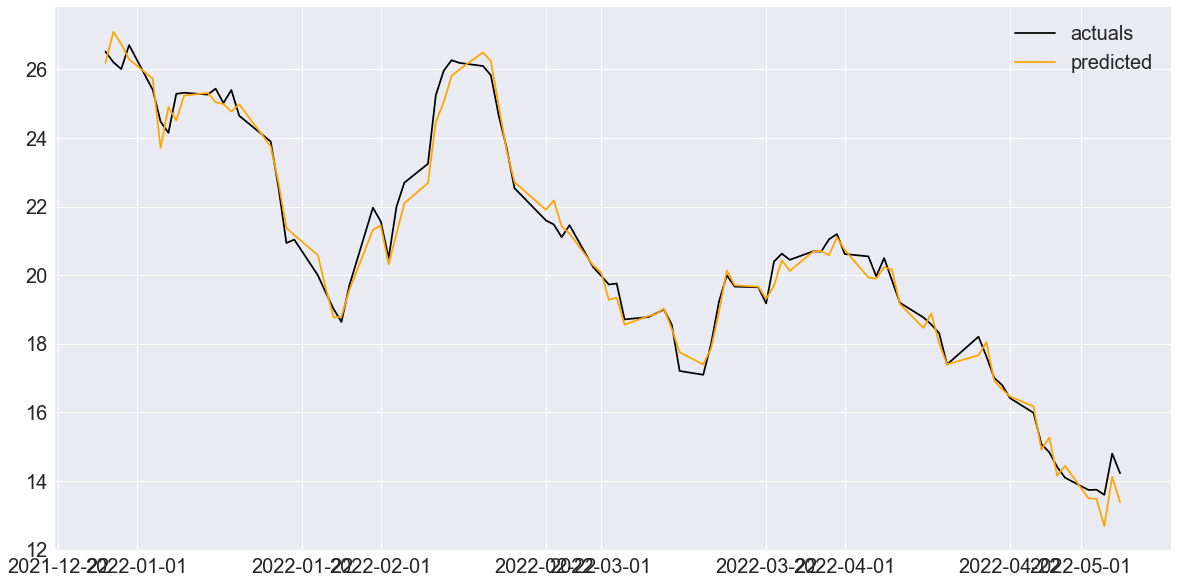

In [68]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test1['tcnnf_next_close'], color='black')
ax.plot(y_test1['tcnnf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## TCNNF, Cannabis ETFs, and DJIX

In [69]:
df_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs_dow.csv')
df_etfs_dow['Date'] = pd.to_datetime(df_etfs_dow['Date'])
df_etfs_dow = df_etfs_dow.set_index('Date')

In [70]:
df2 = pd.merge(df_tcnnf, df_etfs_dow, on='Date', how='left')
df2

tcnnf_Open  tcnnf_High  tcnnf_Low  tcnnf_Close  tcnnf_Volume  \
Date                                                                       
2018-09-27    9.499000   12.000000      9.499       10.507        170400   
2018-09-28   12.000000   12.000000     11.065       11.675        175100   
2018-10-01   12.492000   14.847000     12.475       14.847        324900   
2018-10-02   15.381000   17.789000     15.326       17.270        335600   
2018-10-03   18.587999   18.589001     14.440       15.574        346300   
...                ...         ...        ...          ...           ...   
2022-05-03   14.200000   14.350000     13.540       13.740        522400   
2022-05-04   14.640000   14.640000     13.250       13.750        394600   
2022-05-05   13.990000   13.990000     12.720       13.600        839600   
2022-05-06   13.500000   14.830000     12.791       14.800        315500   
2022-05-09   14.365000   14.900000     13.377       14.230        306300   

            tcnnf_prev_close  tcnnf_next_close  tcnnf_diff  tcnnf_%change  \
Date                                                                        
2018-09-27               NaN            11.675         NaN            NaN   
2018-09-28            10.507            14.847       1.168       0.111164   
2018-10-01            11.675            17.270       3.172       0.271692   
2018-10-02            14.847            15.574       2.423       0.163198   
2018-10-03            17.270            13.938      -1.696      -0.098205   
...                      ...               ...         ...            ...   
2022-05-03            14.100            13.750      -0.360      -0.025532   
2022-05-04            13.740            13.600       0.010       0.000728   
2022-05-05            13.750            14.800      -0.150      -0.010909   
2022-05-06            13.600            14.230       1.200       0.088235   
2022-05-09            14.800               NaN      -0.570      -0.038514   

            tcnnf_5day_avg_close  tcnnf_5day_avg_diff  tcnnf_10day_avg_close  \
Date                                                                           
2018-09-27                   NaN                  NaN                    NaN   
2018-09-28                   NaN                  NaN                    NaN   
2018-10-01                   NaN                  NaN                    NaN   
2018-10-02                   NaN                  NaN                    NaN   
2018-10-03               13.9746                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-03               14.4348              -0.4500                15.6032   
2022-05-04               14.1688              -0.2660                15.2144   
2022-05-05               13.9208              -0.2480                14.8734   
2022-05-06               13.9980               0.0772                14.6734   
2022-05-09               14.0240               0.0260                14.4544   

            tcnnf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-09-27                   NaN  39.000000  39.240002  38.209999  38.720001   
2018-09-28                   NaN  38.869999  40.150002  38.650002  40.049999   
2018-10-01                   NaN  41.230000  41.480000  40.230000  40.700001   
2018-10-02                   NaN  40.419998  40.520000  38.459999  38.660000   
2018-10-03                   NaN  39.299999  40.160000  38.500000  40.040001   
...                          ...        ...        ...        ...        ...   
2022-05-03               -0.4470   8.340000   8.470000   8.240000   8.320000   
2022-05-04               -0.3888   8.340000   8.590000   8.100000   8.590000   
2022-05-05               -0.3410   8.500000   8.508000   8.010000   8.050000   
2022-05-06               -0.2000   8.010000   8.050000   7.750000   7.900000   
2022-05-09          

In [71]:
df_isna2 = df2.isna()
df_isna2

tcnnf_Open  tcnnf_High  tcnnf_Low  tcnnf_Close  tcnnf_Volume  \
Date                                                                       
2018-09-27       False       False      False        False         False   
2018-09-28       False       False      False        False         False   
2018-10-01       False       False      False        False         False   
2018-10-02       False       False      False        False         False   
2018-10-03       False       False      False        False         False   
...                ...         ...        ...          ...           ...   
2022-05-03       False       False      False        False         False   
2022-05-04       False       False      False        False         False   
2022-05-05       False       False      False        False         False   
2022-05-06       False       False      False        False         False   
2022-05-09       False       False      False        False         False   

            tcnnf_prev_close  tcnnf_next_close  tcnnf_diff  tcnnf_%change  \
Date                                                                        
2018-09-27              True             False        True           True   
2018-09-28             False             False       False          False   
2018-10-01             False             False       False          False   
2018-10-02             False             False       False          False   
2018-10-03             False             False       False          False   
...                      ...               ...         ...            ...   
2022-05-03             False             False       False          False   
2022-05-04             False             False       False          False   
2022-05-05             False             False       False          False   
2022-05-06             False             False       False          False   
2022-05-09             False              True       False          False   

            tcnnf_5day_avg_close  tcnnf_5day_avg_diff  tcnnf_10day_avg_close  \
Date                                                                           
2018-09-27                  True                 True                   True   
2018-09-28                  True                 True                   True   
2018-10-01                  True                 True                   True   
2018-10-02                  True                 True                   True   
2018-10-03                 False                 True                   True   
...                          ...                  ...                    ...   
2022-05-03                 False                False                  False   
2022-05-04                 False                False                  False   
2022-05-05                 False                False                  False   
2022-05-06                 False                False                  False   
2022-05-09                 False                False                  False   

            tcnnf_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                   
2018-09-27                  True    False    False   False     False   
2018-09-28                  True    False    False   False     False   
2018-10-01                  True    False    False   False     False   
2018-10-02                  True    False    False   False     False   
2018-10-03                  True    False    False   False     False   
...                          ...      ...      ...     ...       ...   
2022-05-03                 False    False    False   False     False   
2022-05-04                 False    False    False   False     False   
2022-05-05                 False    False    False   False     False   
2022-05-06                 False    False    False   False     False   
2022-05-09                 False    False    False   False     False   

            mj_Volume  mj_prev_close  mj_ne

In [72]:
df_isna2 = df_isna2.add_suffix('_b')

In [73]:
df2 = df2.fillna(0)
df2.head()

tcnnf_Open  tcnnf_High  tcnnf_Low  tcnnf_Close  tcnnf_Volume  \
Date                                                                       
2018-09-27    9.499000   12.000000      9.499       10.507        170400   
2018-09-28   12.000000   12.000000     11.065       11.675        175100   
2018-10-01   12.492000   14.847000     12.475       14.847        324900   
2018-10-02   15.381000   17.789000     15.326       17.270        335600   
2018-10-03   18.587999   18.589001     14.440       15.574        346300   

            tcnnf_prev_close  tcnnf_next_close  tcnnf_diff  tcnnf_%change  \
Date                                                                        
2018-09-27             0.000            11.675       0.000       0.000000   
2018-09-28            10.507            14.847       1.168       0.111164   
2018-10-01            11.675            17.270       3.172       0.271692   
2018-10-02            14.847            15.574       2.423       0.163198   
2018-10-03            17.270            13.938      -1.696      -0.098205   

            tcnnf_5day_avg_close  tcnnf_5day_avg_diff  tcnnf_10day_avg_close  \
Date                                                                           
2018-09-27                0.0000                  0.0                    0.0   
2018-09-28                0.0000                  0.0                    0.0   
2018-10-01                0.0000                  0.0                    0.0   
2018-10-02                0.0000                  0.0                    0.0   
2018-10-03               13.9746                  0.0                    0.0   

            tcnnf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-09-27                   0.0  39.000000  39.240002  38.209999  38.720001   
2018-09-28                   0.0  38.869999  40.150002  38.650002  40.049999   
2018-10-01                   0.0  41.230000  41.480000  40.230000  40.700001   
2018-10-02                   0.0  40.419998  40.520000  38.459999  38.660000   
2018-10-03                   0.0  39.299999  40.160000  38.500000  40.040001   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2018-09-27     979100      38.939999      40.049999 -0.219998   -0.005650   
2018-09-28     653600      38.720001      40.700001  1.329998    0.034349   
2018-10-01    1024100      40.049999      38.660000  0.650002    0.016230   
2018-10-02     899800      40.700001      40.040001 -2.040001   -0.050123   
2018-10-03     706700      38.660000      39.090000  1.380001    0.035696   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2018-09-27             39.158         -0.857999              39.261   
2018-09-28             39.268          0.110000              39.689   
2018-10-01             39.554          0.286000              40.044   
2018-10-02             39.414         -0.140000              39.942   
2018-10-03             39.634          0.220000              39.825   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2018-09-27              0.339        0.0        0.0       0.0         0.0   
2018-09-28              0.428        0.0        0.0       0.0         0.0   
2018-10-01              0.355        0.0        0.0       0.0         0.0   
2018-10-02             -0.102        0.0        0.0       0.0         0.0   
2018-10-03             -0.117        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2018-09-27          0.0              0.0              0.0        0.0   
2018-09-28          0.0

In [74]:
df2 = pd.concat([df2, df_isna2], axis=1)
df2

tcnnf_Open  tcnnf_High  tcnnf_Low  tcnnf_Close  tcnnf_Volume  \
Date                                                                       
2018-09-27    9.499000   12.000000      9.499       10.507        170400   
2018-09-28   12.000000   12.000000     11.065       11.675        175100   
2018-10-01   12.492000   14.847000     12.475       14.847        324900   
2018-10-02   15.381000   17.789000     15.326       17.270        335600   
2018-10-03   18.587999   18.589001     14.440       15.574        346300   
...                ...         ...        ...          ...           ...   
2022-05-03   14.200000   14.350000     13.540       13.740        522400   
2022-05-04   14.640000   14.640000     13.250       13.750        394600   
2022-05-05   13.990000   13.990000     12.720       13.600        839600   
2022-05-06   13.500000   14.830000     12.791       14.800        315500   
2022-05-09   14.365000   14.900000     13.377       14.230        306300   

            tcnnf_prev_close  tcnnf_next_close  tcnnf_diff  tcnnf_%change  \
Date                                                                        
2018-09-27             0.000            11.675       0.000       0.000000   
2018-09-28            10.507            14.847       1.168       0.111164   
2018-10-01            11.675            17.270       3.172       0.271692   
2018-10-02            14.847            15.574       2.423       0.163198   
2018-10-03            17.270            13.938      -1.696      -0.098205   
...                      ...               ...         ...            ...   
2022-05-03            14.100            13.750      -0.360      -0.025532   
2022-05-04            13.740            13.600       0.010       0.000728   
2022-05-05            13.750            14.800      -0.150      -0.010909   
2022-05-06            13.600            14.230       1.200       0.088235   
2022-05-09            14.800             0.000      -0.570      -0.038514   

            tcnnf_5day_avg_close  tcnnf_5day_avg_diff  tcnnf_10day_avg_close  \
Date                                                                           
2018-09-27                0.0000               0.0000                 0.0000   
2018-09-28                0.0000               0.0000                 0.0000   
2018-10-01                0.0000               0.0000                 0.0000   
2018-10-02                0.0000               0.0000                 0.0000   
2018-10-03               13.9746               0.0000                 0.0000   
...                          ...                  ...                    ...   
2022-05-03               14.4348              -0.4500                15.6032   
2022-05-04               14.1688              -0.2660                15.2144   
2022-05-05               13.9208              -0.2480                14.8734   
2022-05-06               13.9980               0.0772                14.6734   
2022-05-09               14.0240               0.0260                14.4544   

            tcnnf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-09-27                0.0000  39.000000  39.240002  38.209999  38.720001   
2018-09-28                0.0000  38.869999  40.150002  38.650002  40.049999   
2018-10-01                0.0000  41.230000  41.480000  40.230000  40.700001   
2018-10-02                0.0000  40.419998  40.520000  38.459999  38.660000   
2018-10-03                0.0000  39.299999  40.160000  38.500000  40.040001   
...                          ...        ...        ...        ...        ...   
2022-05-03               -0.4470   8.340000   8.470000   8.240000   8.320000   
2022-05-04               -0.3888   8.340000   8.590000   8.100000   8.590000   
2022-05-05               -0.3410   8.500000   8.508000   8.010000   8.050000   
2022-05-06               -0.2000   8.010000   8.050000   7.750000   7.900000   
2022-05-09          

In [75]:
df2['month'] = df2.index.month
df2['day'] = df2.index.day
df2['year'] = df2.index.year
df2['quarter'] = (df2['month']-1)//3 + 1

In [76]:
cols = df2.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'tcnnf_Open']

In [77]:
df2 = df2[cols].copy()
df2

month  day  year  quarter  tcnnf_Open  tcnnf_High  tcnnf_Low  \
Date                                                                       
2018-09-27      9   27  2018        3    9.499000   12.000000      9.499   
2018-09-28      9   28  2018        3   12.000000   12.000000     11.065   
2018-10-01     10    1  2018        4   12.492000   14.847000     12.475   
2018-10-02     10    2  2018        4   15.381000   17.789000     15.326   
2018-10-03     10    3  2018        4   18.587999   18.589001     14.440   
...           ...  ...   ...      ...         ...         ...        ...   
2022-05-03      5    3  2022        2   14.200000   14.350000     13.540   
2022-05-04      5    4  2022        2   14.640000   14.640000     13.250   
2022-05-05      5    5  2022        2   13.990000   13.990000     12.720   
2022-05-06      5    6  2022        2   13.500000   14.830000     12.791   
2022-05-09      5    9  2022        2   14.365000   14.900000     13.377   

            tcnnf_Close  tcnnf_Volume  tcnnf_prev_close  tcnnf_next_close  \
Date                                                                        
2018-09-27       10.507        170400             0.000            11.675   
2018-09-28       11.675        175100            10.507            14.847   
2018-10-01       14.847        324900            11.675            17.270   
2018-10-02       17.270        335600            14.847            15.574   
2018-10-03       15.574        346300            17.270            13.938   
...                 ...           ...               ...               ...   
2022-05-03       13.740        522400            14.100            13.750   
2022-05-04       13.750        394600            13.740            13.600   
2022-05-05       13.600        839600            13.750            14.800   
2022-05-06       14.800        315500            13.600            14.230   
2022-05-09       14.230        306300            14.800             0.000   

            tcnnf_diff  tcnnf_%change  tcnnf_5day_avg_close  \
Date                                                          
2018-09-27       0.000       0.000000                0.0000   
2018-09-28       1.168       0.111164                0.0000   
2018-10-01       3.172       0.271692                0.0000   
2018-10-02       2.423       0.163198                0.0000   
2018-10-03      -1.696      -0.098205               13.9746   
...                ...            ...                   ...   
2022-05-03      -0.360      -0.025532               14.4348   
2022-05-04       0.010       0.000728               14.1688   
2022-05-05      -0.150      -0.010909               13.9208   
2022-05-06       1.200       0.088235               13.9980   
2022-05-09      -0.570      -0.038514               14.0240   

            tcnnf_5day_avg_diff  tcnnf_10day_avg_close  tcnnf_10day_avg_diff  \
Date                                                                           
2018-09-27               0.0000                 0.0000                0.0000   
2018-09-28               0.0000                 0.0000                0.0000   
2018-10-01               0.0000                 0.0000                0.0000   
2018-10-02               0.0000                 0.0000                0.0000   
2018-10-03               0.0000                 0.0000                0.0000   
...                         ...                    ...                   ...   
2022-05-03              -0.4500                15.6032               -0.4470   
2022-05-04              -0.2660                15.2144               -0.3888   
2022-05-05              -0.2480                14.8734               -0.3410   
2022-05-06               0.0772                14.6734               -0.2000   
2022-05-09               0.0260                14.4544               -0.2190   

              mj_Open    mj_High     mj_Low   mj_Close  mj_Volume  \
Date                                                                
2018-09-27  39.000000 

In [78]:
df2.drop(df2.tail(1).index, inplace=True)

In [79]:
n = int(len(df2) * 0.9)
n

818

In [80]:
train2 = df2[:n]
test2 = df2[n:]

In [81]:
print(len(train2))
print(len(test2))

818
91


In [82]:
X_train2 = train2.drop('tcnnf_next_close', axis=1)
X_train2.head(3)

month  day  year  quarter  tcnnf_Open  tcnnf_High  tcnnf_Low  \
Date                                                                       
2018-09-27      9   27  2018        3       9.499      12.000      9.499   
2018-09-28      9   28  2018        3      12.000      12.000     11.065   
2018-10-01     10    1  2018        4      12.492      14.847     12.475   

            tcnnf_Close  tcnnf_Volume  tcnnf_prev_close  tcnnf_diff  \
Date                                                                  
2018-09-27       10.507        170400             0.000       0.000   
2018-09-28       11.675        175100            10.507       1.168   
2018-10-01       14.847        324900            11.675       3.172   

            tcnnf_%change  tcnnf_5day_avg_close  tcnnf_5day_avg_diff  \
Date                                                                   
2018-09-27       0.000000                   0.0                  0.0   
2018-09-28       0.111164                   0.0                  0.0   
2018-10-01       0.271692                   0.0                  0.0   

            tcnnf_10day_avg_close  tcnnf_10day_avg_diff    mj_Open    mj_High  \
Date                                                                            
2018-09-27                    0.0                   0.0  39.000000  39.240002   
2018-09-28                    0.0                   0.0  38.869999  40.150002   
2018-10-01                    0.0                   0.0  41.230000  41.480000   

               mj_Low   mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                        
2018-09-27  38.209999  38.720001     979100      38.939999      40.049999   
2018-09-28  38.650002  40.049999     653600      38.720001      40.700001   
2018-10-01  40.230000  40.700001    1024100      40.049999      38.660000   

             mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                    
2018-09-27 -0.219998   -0.005650             39.158         -0.857999   
2018-09-28  1.329998    0.034349             39.268          0.110000   
2018-10-01  0.650002    0.016230             39.554          0.286000   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2018-09-27              39.261              0.339        0.0        0.0   
2018-09-28              39.689              0.428        0.0        0.0   
2018-10-01              40.044              0.355        0.0        0.0   

            msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                             
2018-09-27       0.0         0.0          0.0              0.0   
2018-09-28       0.0         0.0          0.0              0.0   
2018-10-01       0.0         0.0          0.0              0.0   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2018-09-27              0.0        0.0           0.0                  0.0   
2018-09-28              0.0        0.0           0.0                  0.0   
2018-10-01              0.0        0.0           0.0                  0.0   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2018-09-27                 0.0                   0.0                  0.0   
2018-09-28                 0.0                   0.0                  0.0   
2018-10-01                 0.0                   0.0                  0.0   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2018-09-27        0.0        0.0       0.0         0.0          0.0   
2018-09-28        0.0        0.0       0.0         0.0          

In [83]:
X_train2.shape

(818, 185)

In [84]:
y_train2 = train2['tcnnf_next_close']
y_train2.head(3)

Date
2018-09-27    11.675
2018-09-28    14.847
2018-10-01    17.270
Name: tcnnf_next_close, dtype: float64

In [85]:
y_train2.tail(3)

Date
2021-12-22    26.799999
2021-12-23    26.799999
2021-12-27    25.985001
Name: tcnnf_next_close, dtype: float64

In [86]:
X_test2 = test2.drop('tcnnf_next_close', axis=1)
y_test2 = test2['tcnnf_next_close']

In [87]:
X_test2.head(3)

month  day  year  quarter  tcnnf_Open  tcnnf_High  tcnnf_Low  \
Date                                                                       
2021-12-28     12   28  2021        4   26.900000   26.990000      25.00   
2021-12-29     12   29  2021        4   26.000000   26.799999      25.18   
2021-12-30     12   30  2021        4   26.889999   26.980000      25.98   

            tcnnf_Close  tcnnf_Volume  tcnnf_prev_close  tcnnf_diff  \
Date                                                                  
2021-12-28    25.985001        271600         26.799999   -0.814998   
2021-12-29    26.520000        294800         25.985001    0.534999   
2021-12-30    26.209999        336400         26.520000   -0.310001   

            tcnnf_%change  tcnnf_5day_avg_close  tcnnf_5day_avg_diff  \
Date                                                                   
2021-12-28      -0.030410                25.673                0.521   
2021-12-29       0.020589                26.271                0.598   
2021-12-30      -0.011689                26.463                0.192   

            tcnnf_10day_avg_close  tcnnf_10day_avg_diff  mj_Open  mj_High  \
Date                                                                        
2021-12-28                24.8795                0.1535    11.49    11.61   
2021-12-29                25.1265                0.2470    11.25    11.34   
2021-12-30                25.2975                0.1710    11.08    11.45   

            mj_Low  mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                    
2021-12-28   11.27     11.28    1434100          11.61          11.05   
2021-12-29   11.04     11.05    1646800          11.28          11.21   
2021-12-30   11.06     11.21    1813000          11.05          11.08   

            mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                   
2021-12-28    -0.33   -0.028424             11.522             0.040   
2021-12-29    -0.23   -0.020390             11.434            -0.088   
2021-12-30     0.16    0.014480             11.386            -0.048   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2021-12-28              11.389             -0.027  25.270000  25.440001   
2021-12-29              11.374             -0.015  24.799999  25.190001   
2021-12-30              11.365             -0.009  25.010000  25.760000   

             msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                              
2021-12-28  24.360001   24.700001    1140600.0        25.290001   
2021-12-29  24.219999   25.040001    1932500.0        24.700001   
2021-12-30  24.990000   25.469999    1395900.0        25.040001   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2021-12-28        25.040001  -0.590000     -0.023329            24.704001   
2021-12-29        25.469999   0.340000      0.013765            24.990001   
2021-12-30        25.590000   0.429998      0.017172            25.172001   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2021-12-28               0.286             24.395000               -0.018   
2021-12-29               0.286             24.457001                0.062   
2021-12-30               0.182             24.551000                0.094   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2021-12-28      13.02     13.107    12.800       12.84     240900.0   
2021-12-29      12.80     12.940    12.690       12.88     347000.0   
2021-12-30      12.84     13.200 

In [88]:
X_test2.shape

(91, 185)

In [89]:
y_test2.tail(3)

Date
2022-05-04    13.60
2022-05-05    14.80
2022-05-06    14.23
Name: tcnnf_next_close, dtype: float64

In [90]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)

In [91]:
y_pred2[:5]

array([26.19610486, 27.08429218, 26.7480798 , 26.35616035, 25.83839158])

In [92]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man2 = rmse_manual(y_test2, y_pred2)
print(rmse_man2)

0.42743319277138103


In [93]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man2 = mae_manual(y_test2, y_pred2)
print(mae_man2)

0.33589254111717787


In [94]:
hyper_table.append(dict(version='1+ETFs+Dow',
                        model=model2, 
                        rmse=rmse_man2,
                        mae=mae_man2,
                        rows=df2.shape[0], 
                        train_rows=X_train2.shape[0],
                        test_rows=X_test2.shape[0],
                        columns=df2.shape[1]))

In [95]:
y_train2 = pd.DataFrame(y_train2, columns=['tcnnf_next_close'])
y_test2 = pd.DataFrame(y_test2, columns=['tcnnf_next_close'])

In [96]:
y_test2['tcnnf_pred_next_close'] = y_pred2

In [97]:
y_test2.tail()

tcnnf_next_close  tcnnf_pred_next_close
Date                                               
2022-05-02             13.74              13.467357
2022-05-03             13.75              13.649431
2022-05-04             13.60              12.556455
2022-05-05             14.80              13.862334
2022-05-06             14.23              13.232782

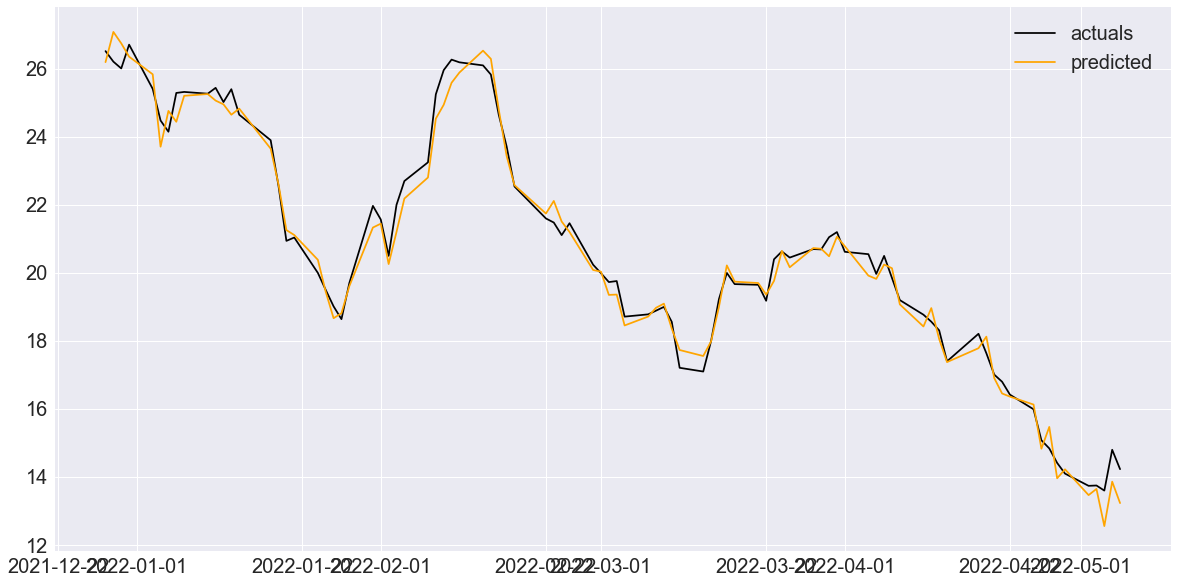

In [98]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test2['tcnnf_next_close'], color='black')
ax.plot(y_test2['tcnnf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (TCNNF target)

In [99]:
df_all = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all.csv')
df_all['Date'] = pd.to_datetime(df_all['Date'])
df_all = df_all.set_index('Date')

In [100]:
df_isna3 = df_all.isna()
df_isna3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [101]:
df_isna3 = df_isna3.add_suffix('_b')

In [102]:
df3 = df_all.fillna(0)
df3.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [103]:
df3 = pd.concat([df3, df_isna3], axis=1)
df3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [104]:
df3['month'] = df3.index.month
df3['day'] = df3.index.day
df3['year'] = df3.index.year
df3['quarter'] = (df3['month']-1)//3 + 1

In [105]:
cols = df3.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [106]:
df3 = df3[cols].copy()
df3

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [107]:
df3 = df3[cut:].copy()
df3

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-09-27      9   27  2018        3  50.970001  51.036999  48.900002   
2018-09-28      9   28  2018        3  48.500000  51.209999  48.419998   
2018-10-01     10    1  2018        4  50.119999  51.147999  48.495998   
2018-10-02     10    2  2018        4  48.790001  49.459999  44.900002   
2018-10-03     10    3  2018        4  46.740002  49.285999  45.930000   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-03      5    3  2022        2   6.000000   6.270000   5.945000   
2022-05-04      5    4  2022        2   6.050000   6.710000   5.850000   
2022-05-05      5    5  2022        2   6.470000   6.590000   6.010000   
2022-05-06      5    6  2022        2   6.010000   6.140000   5.758000   
2022-05-09      5    9  2022        2   5.720000   5.875000   5.550000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-09-27  49.419998    14664400       51.980000       48.639999 -2.560002   
2018-09-28  48.639999     9779000       49.419998       48.849998 -0.779999   
2018-10-01  48.849998     9344200       48.639999       45.740002  0.209999   
2018-10-02  45.740002    10450100       48.849998       49.279999 -3.109996   
2018-10-03  49.279999     8034200       45.740002       48.320000  3.539997   
...               ...         ...             ...             ...       ...   
2022-05-03   6.060000     5017600        6.050000        6.670000  0.010000   
2022-05-04   6.670000     7851100        6.060000        6.070000  0.610000   
2022-05-05   6.070000     5520300        6.670000        5.970000 -0.600000   
2022-05-06   5.970000     3971100        6.070000        5.550000 -0.100000   
2022-05-09   5.550000     4207600        5.970000        0.000000 -0.420000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-09-27    -0.049250           51.284000          -0.596001   
2018-09-28    -0.015783           51.056000          -0.228000   
2018-10-01     0.004317           50.325999          -0.730000   
2018-10-02    -0.063664           48.925999          -1.400000   
2018-10-03     0.077394           48.385999          -0.540000   
...                 ...                 ...                ...   
2022-05-03     0.001653            5.700000           0.152000   
2022-05-04     0.100660            5.988000           0.288000   
2022-05-05    -0.089955            6.112000           0.124000   
2022-05-06    -0.016474            6.164000           0.052000   
2022-05-09    -0.070352            6.064000          -0.100000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-09-27            50.585000               0.535        0.00       0.000   
2018-09-28            50.729999               0.145        0.00       0.000   
2018-10-01            50.754999               0.025        0.00       0.000   
2018-10-02            50.140000              -0.615        0.00       0.000   
2018-10-03            50.133000              -0.007        0.00       0.000   
...                         ...                 ...         ...         ...   
2022-05-03             5.642000               0.013        4.50       4.750   
2022-05-04             5.736000               0.094        4.22       4.414   
2022-05-05             5.768000               0.032        4.20       4.250   
2022-05-06             5.808000               0.040        3.92       4.340   
2022-05-09             5.806000              -0.002        4.30       4.300   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [108]:
df3.drop(df3.tail(1).index, inplace=True)

In [109]:
n = int(len(df3) * 0.9)
n

818

In [110]:
train3 = df3[:n]
test3 = df3[n:]

In [111]:
print(len(train3))
print(len(test3))

818
91


In [112]:
X_train3 = train3.drop('tcnnf_next_close', axis=1)
X_train3.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-09-27      9   27  2018        3  50.970001  51.036999  48.900002   
2018-09-28      9   28  2018        3  48.500000  51.209999  48.419998   
2018-10-01     10    1  2018        4  50.119999  51.147999  48.495998   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-09-27  49.419998    14664400       51.980000       48.639999 -2.560002   
2018-09-28  48.639999     9779000       49.419998       48.849998 -0.779999   
2018-10-01  48.849998     9344200       48.639999       45.740002  0.209999   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-09-27    -0.049250           51.284000          -0.596001   
2018-09-28    -0.015783           51.056000          -0.228000   
2018-10-01     0.004317           50.325999          -0.730000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-09-27            50.585000               0.535         0.0         0.0   
2018-09-28            50.729999               0.145         0.0         0.0   
2018-10-01            50.754999               0.025         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-09-27        0.0          0.0           0.0               0.0   
2018-09-28        0.0          0.0           0.0               0.0   
2018-10-01        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-09-27               0.0         0.0            0.0                   0.0   
2018-09-28               0.0         0.0            0.0                   0.0   
2018-10-01               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-09-27                  0.0                    0.0                   0.0   
2018-09-28                  0.0                    0.0                   0.0   
2018-10-01                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-09-27      11.01      11.47    10.850       10.94   12005400.0   
2018-09-28      10.88      11.40    10.860       11.12   10970500.0   
2018-10-01      11.90      11.99    11.045       11.32   13351600.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-09-27            11.13            11.12      -0.19     -0.017071   
2018-09-28            10.94            11.32       0.18      0.016453   
2018-10-01            11.12            10.72       0.20      0.017986   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-09-27               11.582              -0.562                11.647   
2018-09-28               11.304              -0.278                11.721   
2018-10-01               11.196              -0.108                11.835   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-09-27                0.083         0.0         0.0        0.0   
2018-09-28                0.074         0.

In [113]:
X_train3.shape

(818, 263)

In [114]:
y_train3 = train3['tcnnf_next_close']
y_train3.head(3)

Date
2018-09-27    11.675
2018-09-28    14.847
2018-10-01    17.270
Name: tcnnf_next_close, dtype: float64

In [115]:
y_train3.tail(3)

Date
2021-12-22    26.799999
2021-12-23    26.799999
2021-12-27    25.985001
Name: tcnnf_next_close, dtype: float64

In [116]:
X_test3 = test3.drop('tcnnf_next_close', axis=1)
y_test3 = test3['tcnnf_next_close']

In [117]:
X_test3.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-12-28     12   28  2021        4     9.357     9.660    9.000       9.02   
2021-12-29     12   29  2021        4     9.000     9.180    8.720       8.76   
2021-12-30     12   30  2021        4     8.760     9.295    8.705       8.94   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-12-28     7342900            9.45            8.76     -0.43    -0.045503   
2021-12-29     6949700            9.02            8.94     -0.26    -0.028825   
2021-12-30     7548700            8.76            8.73      0.18     0.020548   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-12-28               9.424              0.054                9.302   
2021-12-29               9.244             -0.180                9.263   
2021-12-30               9.158             -0.086                9.230   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-12-28              -0.029        6.94       6.950       6.40   
2021-12-29              -0.039        6.64       6.700       6.49   
2021-12-30              -0.033        6.65       6.788       6.30   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-12-28         6.50      812000.0              6.88              6.61   
2021-12-29         6.61      859200.0              6.50              6.66   
2021-12-30         6.66     1081900.0              6.61              6.67   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-12-28       -0.38      -0.055233                6.5218   
2021-12-29        0.11       0.016923                6.6060   
2021-12-30        0.05       0.007564                6.6580   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-12-28               0.0480                 6.6639                -0.075   
2021-12-29               0.0842                 6.6009                -0.063   
2021-12-30               0.0520                 6.5669                -0.034   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-12-28      4.120       4.17     3.930        3.96    3084900.0   
2021-12-29      3.930       3.99     3.810        3.85    4436100.0   
2021-12-30      3.795       4.18     3.792        4.01    4337300.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-12-28             4.18             3.85      -0.22     -0.052632   
2021-12-29             3.96             4.01      -0.11     -0.027778   
2021-12-30             3.85             3.92       0.16      0.041558   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-12-28                4.178              -0.028                 4.148   
2021-12-29                4.094              -0.084                 4.125   
2021-12-30                4.052              -0.042                 4.115   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-12-28               -0.020        9.54        9.54       8.28   
2021-12-29               -0.023        8.50        8.75       

In [118]:
X_test3.shape

(91, 263)

In [119]:
y_test3.tail(3)

Date
2022-05-04    13.60
2022-05-05    14.80
2022-05-06    14.23
Name: tcnnf_next_close, dtype: float64

In [120]:
model3 = LinearRegression()
model3.fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)

In [121]:
y_pred3[:5]

array([25.65133072, 26.71992284, 26.70145016, 26.23477551, 26.03489887])

In [122]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man3 = rmse_manual(y_test3, y_pred3)
print(rmse_man3)

0.632257098393668


In [123]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man3 = mae_manual(y_test3, y_pred3)
print(mae_man3)

0.4962098068332012


In [124]:
hyper_table.append(dict(version='All stocks',
                        model=model3, 
                        rmse=rmse_man3,
                        mae=mae_man3,
                        rows=df3.shape[0], 
                        train_rows=X_train3.shape[0],
                        test_rows=X_test3.shape[0],
                        columns=df3.shape[1]))

In [125]:
y_train3 = pd.DataFrame(y_train3, columns=['tcnnf_next_close'])
y_test3 = pd.DataFrame(y_test3, columns=['tcnnf_next_close'])

In [126]:
y_test3['tcnnf_pred_next_close'] = y_pred3

In [127]:
y_test3.tail()

tcnnf_next_close  tcnnf_pred_next_close
Date                                               
2022-05-02             13.74              13.416585
2022-05-03             13.75              13.018326
2022-05-04             13.60              12.738040
2022-05-05             14.80              14.248322
2022-05-06             14.23              13.869434

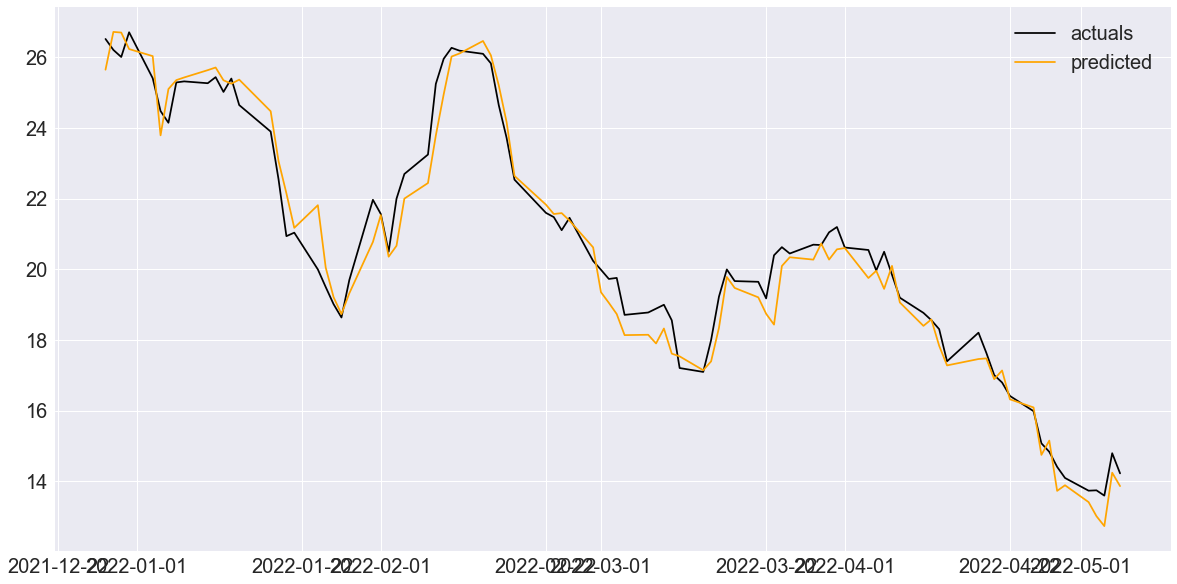

In [128]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test3['tcnnf_next_close'], color='black')
ax.plot(y_test3['tcnnf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (TCNNF target) and DJIX

In [129]:
df_all_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_dow.csv')
df_all_dow['Date'] = pd.to_datetime(df_all_dow['Date'])
df_all_dow = df_all_dow.set_index('Date')

In [130]:
df_isna4 = df_all_dow.isna()
df_isna4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [131]:
df_isna4 = df_isna4.add_suffix('_b')

In [132]:
df4 = df_all_dow.fillna(0)
df4.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [133]:
df4 = pd.concat([df4, df_isna4], axis=1)
df4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [134]:
df4['month'] = df4.index.month
df4['day'] = df4.index.day
df4['year'] = df4.index.year
df4['quarter'] = (df4['month']-1)//3 + 1

In [135]:
cols = df4.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [136]:
df4 = df4[cols].copy()
df4

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [137]:
df4 = df4[cut:].copy()
df4

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-09-27      9   27  2018        3  50.970001  51.036999  48.900002   
2018-09-28      9   28  2018        3  48.500000  51.209999  48.419998   
2018-10-01     10    1  2018        4  50.119999  51.147999  48.495998   
2018-10-02     10    2  2018        4  48.790001  49.459999  44.900002   
2018-10-03     10    3  2018        4  46.740002  49.285999  45.930000   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-03      5    3  2022        2   6.000000   6.270000   5.945000   
2022-05-04      5    4  2022        2   6.050000   6.710000   5.850000   
2022-05-05      5    5  2022        2   6.470000   6.590000   6.010000   
2022-05-06      5    6  2022        2   6.010000   6.140000   5.758000   
2022-05-09      5    9  2022        2   5.720000   5.875000   5.550000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-09-27  49.419998    14664400       51.980000       48.639999 -2.560002   
2018-09-28  48.639999     9779000       49.419998       48.849998 -0.779999   
2018-10-01  48.849998     9344200       48.639999       45.740002  0.209999   
2018-10-02  45.740002    10450100       48.849998       49.279999 -3.109996   
2018-10-03  49.279999     8034200       45.740002       48.320000  3.539997   
...               ...         ...             ...             ...       ...   
2022-05-03   6.060000     5017600        6.050000        6.670000  0.010000   
2022-05-04   6.670000     7851100        6.060000        6.070000  0.610000   
2022-05-05   6.070000     5520300        6.670000        5.970000 -0.600000   
2022-05-06   5.970000     3971100        6.070000        5.550000 -0.100000   
2022-05-09   5.550000     4207600        5.970000        0.000000 -0.420000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-09-27    -0.049250           51.284000          -0.596001   
2018-09-28    -0.015783           51.056000          -0.228000   
2018-10-01     0.004317           50.325999          -0.730000   
2018-10-02    -0.063664           48.925999          -1.400000   
2018-10-03     0.077394           48.385999          -0.540000   
...                 ...                 ...                ...   
2022-05-03     0.001653            5.700000           0.152000   
2022-05-04     0.100660            5.988000           0.288000   
2022-05-05    -0.089955            6.112000           0.124000   
2022-05-06    -0.016474            6.164000           0.052000   
2022-05-09    -0.070352            6.064000          -0.100000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-09-27            50.585000               0.535        0.00       0.000   
2018-09-28            50.729999               0.145        0.00       0.000   
2018-10-01            50.754999               0.025        0.00       0.000   
2018-10-02            50.140000              -0.615        0.00       0.000   
2018-10-03            50.133000              -0.007        0.00       0.000   
...                         ...                 ...         ...         ...   
2022-05-03             5.642000               0.013        4.50       4.750   
2022-05-04             5.736000               0.094        4.22       4.414   
2022-05-05             5.768000               0.032        4.20       4.250   
2022-05-06             5.808000               0.040        3.92       4.340   
2022-05-09             5.806000              -0.002        4.30       4.300   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [138]:
df4.drop(df4.tail(1).index, inplace=True)

In [139]:
n = int(len(df4) * 0.9)
n

818

In [140]:
train4 = df4[:n]
test4 = df4[n:]

In [141]:
print(len(train4))
print(len(test4))

818
91


In [142]:
X_train4 = train4.drop('tcnnf_next_close', axis=1)
X_train4.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-09-27      9   27  2018        3  50.970001  51.036999  48.900002   
2018-09-28      9   28  2018        3  48.500000  51.209999  48.419998   
2018-10-01     10    1  2018        4  50.119999  51.147999  48.495998   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-09-27  49.419998    14664400       51.980000       48.639999 -2.560002   
2018-09-28  48.639999     9779000       49.419998       48.849998 -0.779999   
2018-10-01  48.849998     9344200       48.639999       45.740002  0.209999   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-09-27    -0.049250           51.284000          -0.596001   
2018-09-28    -0.015783           51.056000          -0.228000   
2018-10-01     0.004317           50.325999          -0.730000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-09-27            50.585000               0.535         0.0         0.0   
2018-09-28            50.729999               0.145         0.0         0.0   
2018-10-01            50.754999               0.025         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-09-27        0.0          0.0           0.0               0.0   
2018-09-28        0.0          0.0           0.0               0.0   
2018-10-01        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-09-27               0.0         0.0            0.0                   0.0   
2018-09-28               0.0         0.0            0.0                   0.0   
2018-10-01               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-09-27                  0.0                    0.0                   0.0   
2018-09-28                  0.0                    0.0                   0.0   
2018-10-01                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-09-27      11.01      11.47    10.850       10.94   12005400.0   
2018-09-28      10.88      11.40    10.860       11.12   10970500.0   
2018-10-01      11.90      11.99    11.045       11.32   13351600.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-09-27            11.13            11.12      -0.19     -0.017071   
2018-09-28            10.94            11.32       0.18      0.016453   
2018-10-01            11.12            10.72       0.20      0.017986   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-09-27               11.582              -0.562                11.647   
2018-09-28               11.304              -0.278                11.721   
2018-10-01               11.196              -0.108                11.835   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-09-27                0.083         0.0         0.0        0.0   
2018-09-28                0.074         0.

In [143]:
X_train4.shape

(818, 289)

In [144]:
y_train4 = train4['tcnnf_next_close']
y_train4.head(3)

Date
2018-09-27    11.675
2018-09-28    14.847
2018-10-01    17.270
Name: tcnnf_next_close, dtype: float64

In [145]:
y_train4.tail(3)

Date
2021-12-22    26.799999
2021-12-23    26.799999
2021-12-27    25.985001
Name: tcnnf_next_close, dtype: float64

In [146]:
X_test4 = test4.drop('tcnnf_next_close', axis=1)
y_test4 = test4['tcnnf_next_close']

In [147]:
X_test4.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-12-28     12   28  2021        4     9.357     9.660    9.000       9.02   
2021-12-29     12   29  2021        4     9.000     9.180    8.720       8.76   
2021-12-30     12   30  2021        4     8.760     9.295    8.705       8.94   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-12-28     7342900            9.45            8.76     -0.43    -0.045503   
2021-12-29     6949700            9.02            8.94     -0.26    -0.028825   
2021-12-30     7548700            8.76            8.73      0.18     0.020548   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-12-28               9.424              0.054                9.302   
2021-12-29               9.244             -0.180                9.263   
2021-12-30               9.158             -0.086                9.230   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-12-28              -0.029        6.94       6.950       6.40   
2021-12-29              -0.039        6.64       6.700       6.49   
2021-12-30              -0.033        6.65       6.788       6.30   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-12-28         6.50      812000.0              6.88              6.61   
2021-12-29         6.61      859200.0              6.50              6.66   
2021-12-30         6.66     1081900.0              6.61              6.67   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-12-28       -0.38      -0.055233                6.5218   
2021-12-29        0.11       0.016923                6.6060   
2021-12-30        0.05       0.007564                6.6580   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-12-28               0.0480                 6.6639                -0.075   
2021-12-29               0.0842                 6.6009                -0.063   
2021-12-30               0.0520                 6.5669                -0.034   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-12-28      4.120       4.17     3.930        3.96    3084900.0   
2021-12-29      3.930       3.99     3.810        3.85    4436100.0   
2021-12-30      3.795       4.18     3.792        4.01    4337300.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-12-28             4.18             3.85      -0.22     -0.052632   
2021-12-29             3.96             4.01      -0.11     -0.027778   
2021-12-30             3.85             3.92       0.16      0.041558   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-12-28                4.178              -0.028                 4.148   
2021-12-29                4.094              -0.084                 4.125   
2021-12-30                4.052              -0.042                 4.115   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-12-28               -0.020        9.54        9.54       8.28   
2021-12-29               -0.023        8.50        8.75       

In [148]:
X_test4.shape

(91, 289)

In [149]:
y_test4.tail(3)

Date
2022-05-04    13.60
2022-05-05    14.80
2022-05-06    14.23
Name: tcnnf_next_close, dtype: float64

In [150]:
model4 = LinearRegression()
model4.fit(X_train4, y_train4)
y_pred4 = model4.predict(X_test4)

In [151]:
y_pred4[:5]

array([25.66096127, 26.64500225, 26.66480198, 26.37325967, 26.19260258])

In [152]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man4 = rmse_manual(y_test4, y_pred4)
print(rmse_man4)

0.6607396874885476


In [153]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man4 = mae_manual(y_test4, y_pred4)
print(mae_man4)

0.5199462034121866


In [154]:
hyper_table.append(dict(version='All+Dow',
                        model=model4, 
                        rmse=rmse_man4,
                        mae=mae_man4,
                        rows=df4.shape[0], 
                        train_rows=X_train4.shape[0],
                        test_rows=X_test4.shape[0],
                        columns=df4.shape[1]))

In [155]:
y_train4 = pd.DataFrame(y_train4, columns=['tcnnf_next_close'])
y_test4 = pd.DataFrame(y_test4, columns=['tcnnf_next_close'])

In [156]:
y_test4['tcnnf_pred_next_close'] = y_pred4

In [157]:
y_test4.tail()

tcnnf_next_close  tcnnf_pred_next_close
Date                                               
2022-05-02             13.74              13.136600
2022-05-03             13.75              12.894823
2022-05-04             13.60              12.364138
2022-05-05             14.80              14.134412
2022-05-06             14.23              13.646266

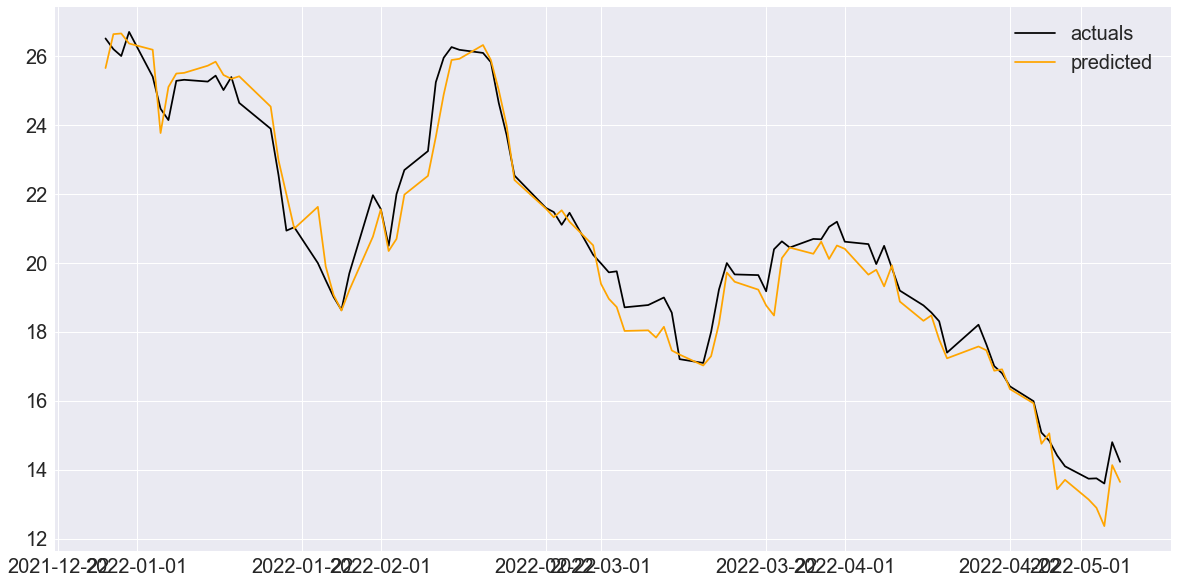

In [158]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test4['tcnnf_next_close'], color='black')
ax.plot(y_test4['tcnnf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (TCNNF target) and Cannabis ETFs

In [159]:
df_all_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs.csv')
df_all_etfs['Date'] = pd.to_datetime(df_all_etfs['Date'])
df_all_etfs = df_all_etfs.set_index('Date')

In [160]:
df_isna5 = df_all_etfs.isna()
df_isna5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [161]:
df_isna5 = df_isna5.add_suffix('_b')

In [162]:
df5 = df_all_etfs.fillna(0)
df5.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [163]:
df5 = pd.concat([df5, df_isna5], axis=1)
df5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [164]:
df5['month'] = df5.index.month
df5['day'] = df5.index.day
df5['year'] = df5.index.year
df5['quarter'] = (df5['month']-1)//3 + 1

In [165]:
cols = df5.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [166]:
df5 = df5[cols].copy()
df5

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [167]:
df5 = df5[cut:].copy()
df5

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-09-27      9   27  2018        3  50.970001  51.036999  48.900002   
2018-09-28      9   28  2018        3  48.500000  51.209999  48.419998   
2018-10-01     10    1  2018        4  50.119999  51.147999  48.495998   
2018-10-02     10    2  2018        4  48.790001  49.459999  44.900002   
2018-10-03     10    3  2018        4  46.740002  49.285999  45.930000   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-03      5    3  2022        2   6.000000   6.270000   5.945000   
2022-05-04      5    4  2022        2   6.050000   6.710000   5.850000   
2022-05-05      5    5  2022        2   6.470000   6.590000   6.010000   
2022-05-06      5    6  2022        2   6.010000   6.140000   5.758000   
2022-05-09      5    9  2022        2   5.720000   5.875000   5.550000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-09-27  49.419998    14664400       51.980000       48.639999 -2.560002   
2018-09-28  48.639999     9779000       49.419998       48.849998 -0.779999   
2018-10-01  48.849998     9344200       48.639999       45.740002  0.209999   
2018-10-02  45.740002    10450100       48.849998       49.279999 -3.109996   
2018-10-03  49.279999     8034200       45.740002       48.320000  3.539997   
...               ...         ...             ...             ...       ...   
2022-05-03   6.060000     5017600        6.050000        6.670000  0.010000   
2022-05-04   6.670000     7851100        6.060000        6.070000  0.610000   
2022-05-05   6.070000     5520300        6.670000        5.970000 -0.600000   
2022-05-06   5.970000     3971100        6.070000        5.550000 -0.100000   
2022-05-09   5.550000     4207600        5.970000        0.000000 -0.420000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-09-27    -0.049250           51.284000          -0.596001   
2018-09-28    -0.015783           51.056000          -0.228000   
2018-10-01     0.004317           50.325999          -0.730000   
2018-10-02    -0.063664           48.925999          -1.400000   
2018-10-03     0.077394           48.385999          -0.540000   
...                 ...                 ...                ...   
2022-05-03     0.001653            5.700000           0.152000   
2022-05-04     0.100660            5.988000           0.288000   
2022-05-05    -0.089955            6.112000           0.124000   
2022-05-06    -0.016474            6.164000           0.052000   
2022-05-09    -0.070352            6.064000          -0.100000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-09-27            50.585000               0.535        0.00       0.000   
2018-09-28            50.729999               0.145        0.00       0.000   
2018-10-01            50.754999               0.025        0.00       0.000   
2018-10-02            50.140000              -0.615        0.00       0.000   
2018-10-03            50.133000              -0.007        0.00       0.000   
...                         ...                 ...         ...         ...   
2022-05-03             5.642000               0.013        4.50       4.750   
2022-05-04             5.736000               0.094        4.22       4.414   
2022-05-05             5.768000               0.032        4.20       4.250   
2022-05-06             5.808000               0.040        3.92       4.340   
2022-05-09             5.806000              -0.002        4.30       4.300   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [168]:
df5.drop(df5.tail(1).index, inplace=True)

In [169]:
n = int(len(df5) * 0.9)
n

818

In [170]:
train5 = df5[:n]
test5 = df5[n:]

In [171]:
print(len(train5))
print(len(test5))

818
91


In [172]:
X_train5 = train5.drop('tcnnf_next_close', axis=1)
X_train5.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-09-27      9   27  2018        3  50.970001  51.036999  48.900002   
2018-09-28      9   28  2018        3  48.500000  51.209999  48.419998   
2018-10-01     10    1  2018        4  50.119999  51.147999  48.495998   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-09-27  49.419998    14664400       51.980000       48.639999 -2.560002   
2018-09-28  48.639999     9779000       49.419998       48.849998 -0.779999   
2018-10-01  48.849998     9344200       48.639999       45.740002  0.209999   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-09-27    -0.049250           51.284000          -0.596001   
2018-09-28    -0.015783           51.056000          -0.228000   
2018-10-01     0.004317           50.325999          -0.730000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-09-27            50.585000               0.535         0.0         0.0   
2018-09-28            50.729999               0.145         0.0         0.0   
2018-10-01            50.754999               0.025         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-09-27        0.0          0.0           0.0               0.0   
2018-09-28        0.0          0.0           0.0               0.0   
2018-10-01        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-09-27               0.0         0.0            0.0                   0.0   
2018-09-28               0.0         0.0            0.0                   0.0   
2018-10-01               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-09-27                  0.0                    0.0                   0.0   
2018-09-28                  0.0                    0.0                   0.0   
2018-10-01                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-09-27      11.01      11.47    10.850       10.94   12005400.0   
2018-09-28      10.88      11.40    10.860       11.12   10970500.0   
2018-10-01      11.90      11.99    11.045       11.32   13351600.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-09-27            11.13            11.12      -0.19     -0.017071   
2018-09-28            10.94            11.32       0.18      0.016453   
2018-10-01            11.12            10.72       0.20      0.017986   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-09-27               11.582              -0.562                11.647   
2018-09-28               11.304              -0.278                11.721   
2018-10-01               11.196              -0.108                11.835   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-09-27                0.083         0.0         0.0        0.0   
2018-09-28                0.074         0.

In [173]:
X_train5.shape

(818, 393)

In [174]:
y_train5 = train5['tcnnf_next_close']
y_train5.head(3)

Date
2018-09-27    11.675
2018-09-28    14.847
2018-10-01    17.270
Name: tcnnf_next_close, dtype: float64

In [175]:
y_train5.tail(3)

Date
2021-12-22    26.799999
2021-12-23    26.799999
2021-12-27    25.985001
Name: tcnnf_next_close, dtype: float64

In [176]:
X_test5 = test5.drop('tcnnf_next_close', axis=1)
y_test5 = test5['tcnnf_next_close']

In [177]:
X_test5.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-12-28     12   28  2021        4     9.357     9.660    9.000       9.02   
2021-12-29     12   29  2021        4     9.000     9.180    8.720       8.76   
2021-12-30     12   30  2021        4     8.760     9.295    8.705       8.94   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-12-28     7342900            9.45            8.76     -0.43    -0.045503   
2021-12-29     6949700            9.02            8.94     -0.26    -0.028825   
2021-12-30     7548700            8.76            8.73      0.18     0.020548   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-12-28               9.424              0.054                9.302   
2021-12-29               9.244             -0.180                9.263   
2021-12-30               9.158             -0.086                9.230   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-12-28              -0.029        6.94       6.950       6.40   
2021-12-29              -0.039        6.64       6.700       6.49   
2021-12-30              -0.033        6.65       6.788       6.30   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-12-28         6.50      812000.0              6.88              6.61   
2021-12-29         6.61      859200.0              6.50              6.66   
2021-12-30         6.66     1081900.0              6.61              6.67   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-12-28       -0.38      -0.055233                6.5218   
2021-12-29        0.11       0.016923                6.6060   
2021-12-30        0.05       0.007564                6.6580   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-12-28               0.0480                 6.6639                -0.075   
2021-12-29               0.0842                 6.6009                -0.063   
2021-12-30               0.0520                 6.5669                -0.034   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-12-28      4.120       4.17     3.930        3.96    3084900.0   
2021-12-29      3.930       3.99     3.810        3.85    4436100.0   
2021-12-30      3.795       4.18     3.792        4.01    4337300.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-12-28             4.18             3.85      -0.22     -0.052632   
2021-12-29             3.96             4.01      -0.11     -0.027778   
2021-12-30             3.85             3.92       0.16      0.041558   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-12-28                4.178              -0.028                 4.148   
2021-12-29                4.094              -0.084                 4.125   
2021-12-30                4.052              -0.042                 4.115   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-12-28               -0.020        9.54        9.54       8.28   
2021-12-29               -0.023        8.50        8.75       

In [178]:
X_test5.shape

(91, 393)

In [179]:
y_test5.tail(3)

Date
2022-05-04    13.60
2022-05-05    14.80
2022-05-06    14.23
Name: tcnnf_next_close, dtype: float64

In [180]:
model5 = LinearRegression()
model5.fit(X_train5, y_train5)
y_pred5 = model5.predict(X_test5)

In [181]:
y_pred5[:5]

array([25.57043867, 27.11584458, 26.67401749, 26.45930622, 25.78663333])

In [182]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man5 = rmse_manual(y_test5, y_pred5)
print(rmse_man5)

0.7572170277092823


In [183]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man5 = mae_manual(y_test5, y_pred5)
print(mae_man5)

0.6477890072975236


In [184]:
hyper_table.append(dict(version='All+ETFs',
                        model=model5, 
                        rmse=rmse_man5,
                        mae=mae_man5,
                        rows=df5.shape[0], 
                        train_rows=X_train5.shape[0],
                        test_rows=X_test5.shape[0],
                        columns=df5.shape[1]))

In [185]:
y_train5 = pd.DataFrame(y_train5, columns=['tcnnf_next_close'])
y_test5 = pd.DataFrame(y_test5, columns=['tcnnf_next_close'])

In [186]:
y_test5['tcnnf_pred_next_close'] = y_pred5

In [187]:
y_test5.tail()

tcnnf_next_close  tcnnf_pred_next_close
Date                                               
2022-05-02             13.74              12.966595
2022-05-03             13.75              12.517283
2022-05-04             13.60              12.425031
2022-05-05             14.80              13.640088
2022-05-06             14.23              12.993630

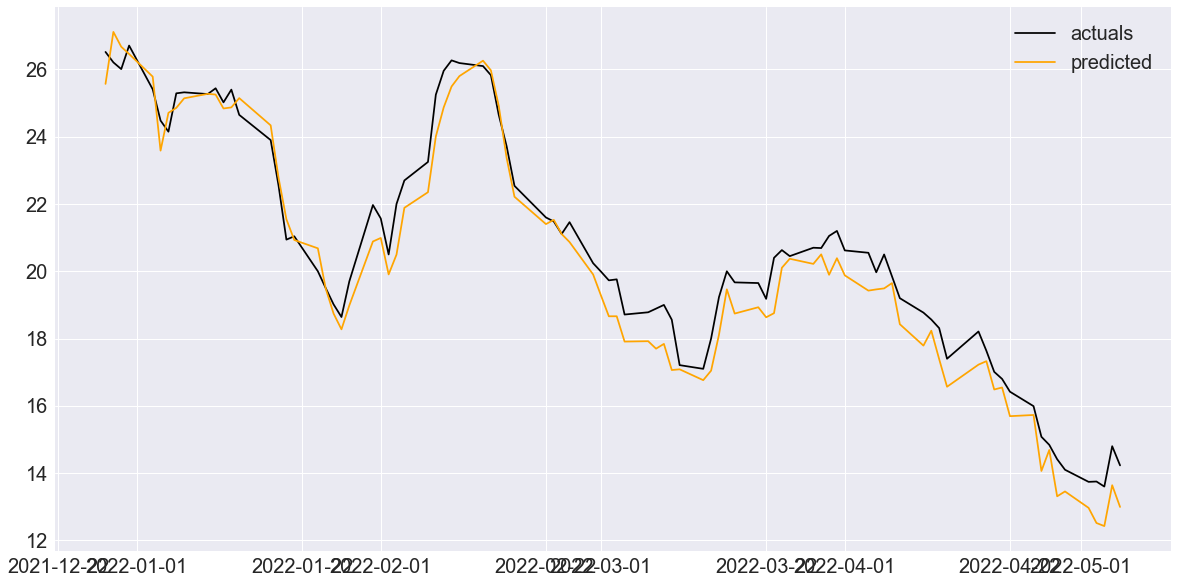

In [188]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test5['tcnnf_next_close'], color='black')
ax.plot(y_test5['tcnnf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (TCNNF target), Cannabis ETFs, and DJIX

In [189]:
df_all_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs_dow.csv')
df_all_etfs_dow['Date'] = pd.to_datetime(df_all_etfs_dow['Date'])
df_all_etfs_dow = df_all_etfs_dow.set_index('Date')

In [190]:
df_isna6 = df_all_etfs_dow.isna()
df_isna6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [191]:
df_isna6 = df_isna6.add_suffix('_b')

In [192]:
df6 = df_all_etfs_dow.fillna(0)
df6.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [193]:
df6 = pd.concat([df6, df_isna6], axis=1)
df6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [194]:
df6['month'] = df6.index.month
df6['day'] = df6.index.day
df6['year'] = df6.index.year
df6['quarter'] = (df6['month']-1)//3 + 1

In [195]:
cols = df6.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [196]:
df6 = df6[cols].copy()
df6

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [197]:
df6 = df6[cut:].copy()
df6

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-09-27      9   27  2018        3  50.970001  51.036999  48.900002   
2018-09-28      9   28  2018        3  48.500000  51.209999  48.419998   
2018-10-01     10    1  2018        4  50.119999  51.147999  48.495998   
2018-10-02     10    2  2018        4  48.790001  49.459999  44.900002   
2018-10-03     10    3  2018        4  46.740002  49.285999  45.930000   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-03      5    3  2022        2   6.000000   6.270000   5.945000   
2022-05-04      5    4  2022        2   6.050000   6.710000   5.850000   
2022-05-05      5    5  2022        2   6.470000   6.590000   6.010000   
2022-05-06      5    6  2022        2   6.010000   6.140000   5.758000   
2022-05-09      5    9  2022        2   5.720000   5.875000   5.550000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-09-27  49.419998    14664400       51.980000       48.639999 -2.560002   
2018-09-28  48.639999     9779000       49.419998       48.849998 -0.779999   
2018-10-01  48.849998     9344200       48.639999       45.740002  0.209999   
2018-10-02  45.740002    10450100       48.849998       49.279999 -3.109996   
2018-10-03  49.279999     8034200       45.740002       48.320000  3.539997   
...               ...         ...             ...             ...       ...   
2022-05-03   6.060000     5017600        6.050000        6.670000  0.010000   
2022-05-04   6.670000     7851100        6.060000        6.070000  0.610000   
2022-05-05   6.070000     5520300        6.670000        5.970000 -0.600000   
2022-05-06   5.970000     3971100        6.070000        5.550000 -0.100000   
2022-05-09   5.550000     4207600        5.970000        0.000000 -0.420000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-09-27    -0.049250           51.284000          -0.596001   
2018-09-28    -0.015783           51.056000          -0.228000   
2018-10-01     0.004317           50.325999          -0.730000   
2018-10-02    -0.063664           48.925999          -1.400000   
2018-10-03     0.077394           48.385999          -0.540000   
...                 ...                 ...                ...   
2022-05-03     0.001653            5.700000           0.152000   
2022-05-04     0.100660            5.988000           0.288000   
2022-05-05    -0.089955            6.112000           0.124000   
2022-05-06    -0.016474            6.164000           0.052000   
2022-05-09    -0.070352            6.064000          -0.100000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-09-27            50.585000               0.535        0.00       0.000   
2018-09-28            50.729999               0.145        0.00       0.000   
2018-10-01            50.754999               0.025        0.00       0.000   
2018-10-02            50.140000              -0.615        0.00       0.000   
2018-10-03            50.133000              -0.007        0.00       0.000   
...                         ...                 ...         ...         ...   
2022-05-03             5.642000               0.013        4.50       4.750   
2022-05-04             5.736000               0.094        4.22       4.414   
2022-05-05             5.768000               0.032        4.20       4.250   
2022-05-06             5.808000               0.040        3.92       4.340   
2022-05-09             5.806000              -0.002        4.30       4.300   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [198]:
df6.drop(df6.tail(1).index, inplace=True)

In [199]:
n = int(len(df6) * 0.9)
n

818

In [200]:
train6 = df6[:n]
test6 = df6[n:]

In [201]:
print(len(train6))
print(len(test6))

818
91


In [202]:
X_train6 = train6.drop('tcnnf_next_close', axis=1)
X_train6.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-09-27      9   27  2018        3  50.970001  51.036999  48.900002   
2018-09-28      9   28  2018        3  48.500000  51.209999  48.419998   
2018-10-01     10    1  2018        4  50.119999  51.147999  48.495998   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-09-27  49.419998    14664400       51.980000       48.639999 -2.560002   
2018-09-28  48.639999     9779000       49.419998       48.849998 -0.779999   
2018-10-01  48.849998     9344200       48.639999       45.740002  0.209999   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-09-27    -0.049250           51.284000          -0.596001   
2018-09-28    -0.015783           51.056000          -0.228000   
2018-10-01     0.004317           50.325999          -0.730000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-09-27            50.585000               0.535         0.0         0.0   
2018-09-28            50.729999               0.145         0.0         0.0   
2018-10-01            50.754999               0.025         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-09-27        0.0          0.0           0.0               0.0   
2018-09-28        0.0          0.0           0.0               0.0   
2018-10-01        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-09-27               0.0         0.0            0.0                   0.0   
2018-09-28               0.0         0.0            0.0                   0.0   
2018-10-01               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-09-27                  0.0                    0.0                   0.0   
2018-09-28                  0.0                    0.0                   0.0   
2018-10-01                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-09-27      11.01      11.47    10.850       10.94   12005400.0   
2018-09-28      10.88      11.40    10.860       11.12   10970500.0   
2018-10-01      11.90      11.99    11.045       11.32   13351600.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-09-27            11.13            11.12      -0.19     -0.017071   
2018-09-28            10.94            11.32       0.18      0.016453   
2018-10-01            11.12            10.72       0.20      0.017986   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-09-27               11.582              -0.562                11.647   
2018-09-28               11.304              -0.278                11.721   
2018-10-01               11.196              -0.108                11.835   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-09-27                0.083         0.0         0.0        0.0   
2018-09-28                0.074         0.

In [203]:
X_train6.shape

(818, 419)

In [204]:
y_train6 = train6['tcnnf_next_close']
y_train6.head(3)

Date
2018-09-27    11.675
2018-09-28    14.847
2018-10-01    17.270
Name: tcnnf_next_close, dtype: float64

In [205]:
y_train6.tail(3)

Date
2021-12-22    26.799999
2021-12-23    26.799999
2021-12-27    25.985001
Name: tcnnf_next_close, dtype: float64

In [206]:
X_test6 = test6.drop('tcnnf_next_close', axis=1)
y_test6 = test6['tcnnf_next_close']

In [207]:
X_test6.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-12-28     12   28  2021        4     9.357     9.660    9.000       9.02   
2021-12-29     12   29  2021        4     9.000     9.180    8.720       8.76   
2021-12-30     12   30  2021        4     8.760     9.295    8.705       8.94   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-12-28     7342900            9.45            8.76     -0.43    -0.045503   
2021-12-29     6949700            9.02            8.94     -0.26    -0.028825   
2021-12-30     7548700            8.76            8.73      0.18     0.020548   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-12-28               9.424              0.054                9.302   
2021-12-29               9.244             -0.180                9.263   
2021-12-30               9.158             -0.086                9.230   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-12-28              -0.029        6.94       6.950       6.40   
2021-12-29              -0.039        6.64       6.700       6.49   
2021-12-30              -0.033        6.65       6.788       6.30   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-12-28         6.50      812000.0              6.88              6.61   
2021-12-29         6.61      859200.0              6.50              6.66   
2021-12-30         6.66     1081900.0              6.61              6.67   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-12-28       -0.38      -0.055233                6.5218   
2021-12-29        0.11       0.016923                6.6060   
2021-12-30        0.05       0.007564                6.6580   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-12-28               0.0480                 6.6639                -0.075   
2021-12-29               0.0842                 6.6009                -0.063   
2021-12-30               0.0520                 6.5669                -0.034   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-12-28      4.120       4.17     3.930        3.96    3084900.0   
2021-12-29      3.930       3.99     3.810        3.85    4436100.0   
2021-12-30      3.795       4.18     3.792        4.01    4337300.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-12-28             4.18             3.85      -0.22     -0.052632   
2021-12-29             3.96             4.01      -0.11     -0.027778   
2021-12-30             3.85             3.92       0.16      0.041558   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-12-28                4.178              -0.028                 4.148   
2021-12-29                4.094              -0.084                 4.125   
2021-12-30                4.052              -0.042                 4.115   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-12-28               -0.020        9.54        9.54       8.28   
2021-12-29               -0.023        8.50        8.75       

In [208]:
X_test6.shape

(91, 419)

In [209]:
y_test6.tail(3)

Date
2022-05-04    13.60
2022-05-05    14.80
2022-05-06    14.23
Name: tcnnf_next_close, dtype: float64

In [210]:
model6 = LinearRegression()
model6.fit(X_train6, y_train6)
y_pred6 = model6.predict(X_test6)

In [211]:
y_pred6[:5]

array([25.52523719, 27.09300813, 26.67198283, 26.59821454, 26.07258251])

In [212]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man6 = rmse_manual(y_test6, y_pred6)
print(rmse_man6)

0.6753721441477711


In [213]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man6 = mae_manual(y_test6, y_pred6)
print(mae_man6)

0.5685796069161817


In [214]:
hyper_table.append(dict(version='All+ETFs+Dow',
                        model=model6, 
                        rmse=rmse_man6,
                        mae=mae_man6,
                        rows=df6.shape[0], 
                        train_rows=X_train6.shape[0],
                        test_rows=X_test6.shape[0],
                        columns=df6.shape[1]))

In [215]:
y_train6 = pd.DataFrame(y_train6, columns=['tcnnf_next_close'])
y_test6 = pd.DataFrame(y_test6, columns=['tcnnf_next_close'])

In [216]:
y_test6['tcnnf_pred_next_close'] = y_pred6

In [217]:
y_test6.tail()

tcnnf_next_close  tcnnf_pred_next_close
Date                                               
2022-05-02             13.74              13.033264
2022-05-03             13.75              12.767020
2022-05-04             13.60              12.274923
2022-05-05             14.80              13.824946
2022-05-06             14.23              12.998539

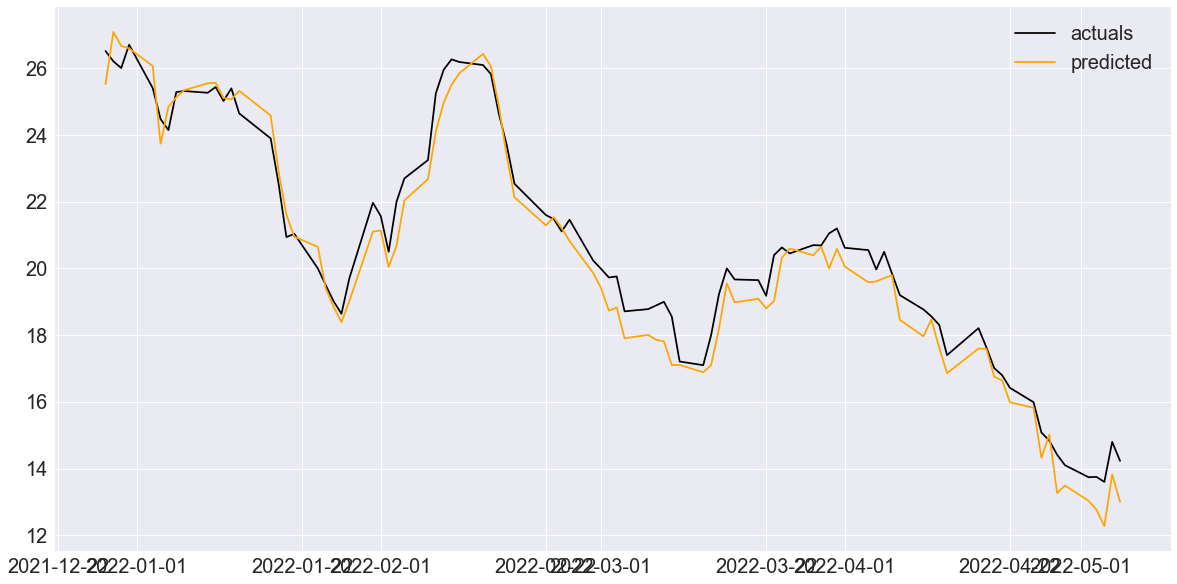

In [218]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test6['tcnnf_next_close'], color='black')
ax.plot(y_test6['tcnnf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

In [219]:
hyper_table = pd.DataFrame(hyper_table)
hyper_table = hyper_table.sort_values('rmse', ascending=True)
hyper_table

version               model      rmse       mae  rows  train_rows  \
1        1+ETFs  LinearRegression()  0.408986  0.323160   909         818   
2    1+ETFs+Dow  LinearRegression()  0.427433  0.335893   909         818   
3    All stocks  LinearRegression()  0.632257  0.496210   909         818   
4       All+Dow  LinearRegression()  0.660740  0.519946   909         818   
6  All+ETFs+Dow  LinearRegression()  0.675372  0.568580   909         818   
0         1+Dow  LinearRegression()  0.687885  0.558018   909         818   
5      All+ETFs  LinearRegression()  0.757217  0.647789   909         818   

   test_rows  columns  
1         91      160  
2         91      186  
3         91      264  
4         91      290  
6         91      420  
0         91       56  
5         91      394

In [220]:
# hyper_table.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/data from notebooks/hyper_table.csv', index=False)